# Graficando los resultados

In [2]:
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import make_multilabel_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
import plotly.express as px
import matplotlib.pyplot as matplotlib
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

## Cargamos los sujetos medios

**Alzhéimer**

In [4]:
df_AD_OK_mean = pd.read_csv("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/AD/df_AD_OK_mean.csv")
df_AD_OK_mean.drop(columns='Unnamed: 0', inplace=True)
df_AD_OK_mean

AD_prob  CTR_prob  DFT_prob  rh_middletemporal_thickness  \
0  0.723539  0.100037  0.176424                     2.605866   

   rh_supramarginal_thickness  rh_superiortemporal_thickness  \
0                    2.318701                       2.586433   

   rh_insula_thickness  rh_inferiortemporal_thickness  \
0             2.831045                       2.640164   

   rh_inferiorparietal_thickness  rh_fusiform_thickness  ...  \
0                       2.175015               2.580836  ...   

   Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0        3320.78806    1171.176119             14202.873134   

   Right.Cerebellum.Cortex  Right.Thalamus.Proper  Right.Caudate  \
0             51710.659701            6509.252239    3079.485075   

   Right.Putamen  Right.Pallidum  Right.Hippocampus  Right.Amygdala  
0    4128.570149      1857.91791        3413.502985     1340.870149  

[1 rows x 87 columns]

**Demencia Frontotemporal**

In [5]:
df_DFT_OK_mean = pd.read_csv("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/DFT/df_DFT_OK_mean.csv")
df_DFT_OK_mean.drop(columns='Unnamed: 0', inplace=True)
df_DFT_OK_mean

AD_prob  CTR_prob  DFT_prob  rh_middletemporal_thickness  \
0  0.232237  0.094524   0.67324                     2.559182   

   rh_supramarginal_thickness  rh_superiortemporal_thickness  \
0                    2.438485                       2.515818   

   rh_insula_thickness  rh_inferiortemporal_thickness  \
0             2.595667                       2.542606   

   rh_inferiorparietal_thickness  rh_fusiform_thickness  ...  \
0                       2.440242               2.449758  ...   

   Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0       3016.439394     992.739394             19778.918182   

   Right.Cerebellum.Cortex  Right.Thalamus.Proper  Right.Caudate  \
0             49627.433333            6445.409091    3100.630303   

   Right.Putamen  Right.Pallidum  Right.Hippocampus  Right.Amygdala  
0    3755.642424     1860.312121        3240.042424     1251.084848  

[1 rows x 87 columns]

**Control**

In [6]:
df_CTR_OK_mean = pd.read_csv("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/CTR/df_CTR_OK_mean.csv")
df_CTR_OK_mean.drop(columns='Unnamed: 0', inplace=True)
df_CTR_OK_mean

AD_prob  CTR_prob  DFT_prob  rh_middletemporal_thickness  \
0  0.182869  0.653374  0.163757                      2.94559   

   rh_supramarginal_thickness  rh_superiortemporal_thickness  \
0                    2.614754                       2.852377   

   rh_insula_thickness  rh_inferiortemporal_thickness  \
0             3.021049                       2.856738   

   rh_inferiorparietal_thickness  rh_fusiform_thickness  ...  \
0                       2.554295               2.799492  ...   

   Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0       3944.231148    1516.665574               8534.27541   

   Right.Cerebellum.Cortex  Right.Thalamus.Proper  Right.Caudate  \
0             51555.857377            6963.301639    3463.954098   

   Right.Putamen  Right.Pallidum  Right.Hippocampus  Right.Amygdala  
0    4592.193443     1767.057377        4021.959016     1694.011475  

[1 rows x 87 columns]

**Sujetos bien clasificados**

In [7]:
df_all = pd.read_csv('/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/all_Classification_date.csv')
df_all.drop(columns='Unnamed: 0', inplace=True, axis=1)
df_all_OK = df_all[df_all['Group']==df_all['Predict_Class']]

# ALZHÉIMER
df_all_OK_AD = df_all_OK[df_all_OK['Group']=='AD']

# DEMENCIA FRONTOTEMPORAL
df_all_OK_DFT = df_all_OK[df_all_OK['Group']=='DFT']

# CONTROL
df_all_OK_CTR = df_all_OK[df_all_OK['Group']=='CTR']

# 1.- Comparación de Grosores y Volúmenes medios entre sujetos promedios

In [54]:
# SPLIT DE MEDIDAS DE GROSOR Y VOLÚMENES DE LOS SUJETOS MEDIOS

# SUJETO ALZÉIMER PROMEDIO

#Thickness RIGHT
df_AD_mean_thickness_RIGHT = df_AD_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

#Thickness LEFT
df_AD_mean_thickness_LEFT = df_AD_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

# VOLÚMENES ALZHÉIMER
df_AD_mean_volumes = df_AD_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
'Left.Cerebellum.Cortex','Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex'], axis=1)



# SUJETO DEMENCIA FRONTOTEMPORAL PROMEDIO

#Thickness RIGHT
df_DFT_mean_thickness_RIGHT = df_DFT_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

#Thickness LEFT
df_DFT_mean_thickness_LEFT = df_DFT_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

#VOLÚMENES DFT
df_DFT_mean_volumes = df_DFT_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex','Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex'], axis=1)


# SUJETO CONTROL PROMEDIO

#Thickness RIGHT
df_CTR_mean_thickness_RIGHT = df_CTR_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

#Thickness LEFT
df_CTR_mean_thickness_LEFT = df_CTR_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

# VOLÚMENES CTR
df_CTR_mean_volumes = df_CTR_OK_mean.drop(['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex','Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex'], axis=1)

## 1.2.- Comparación de GROSORES entre sujetos promedios AD / DFT / CTR

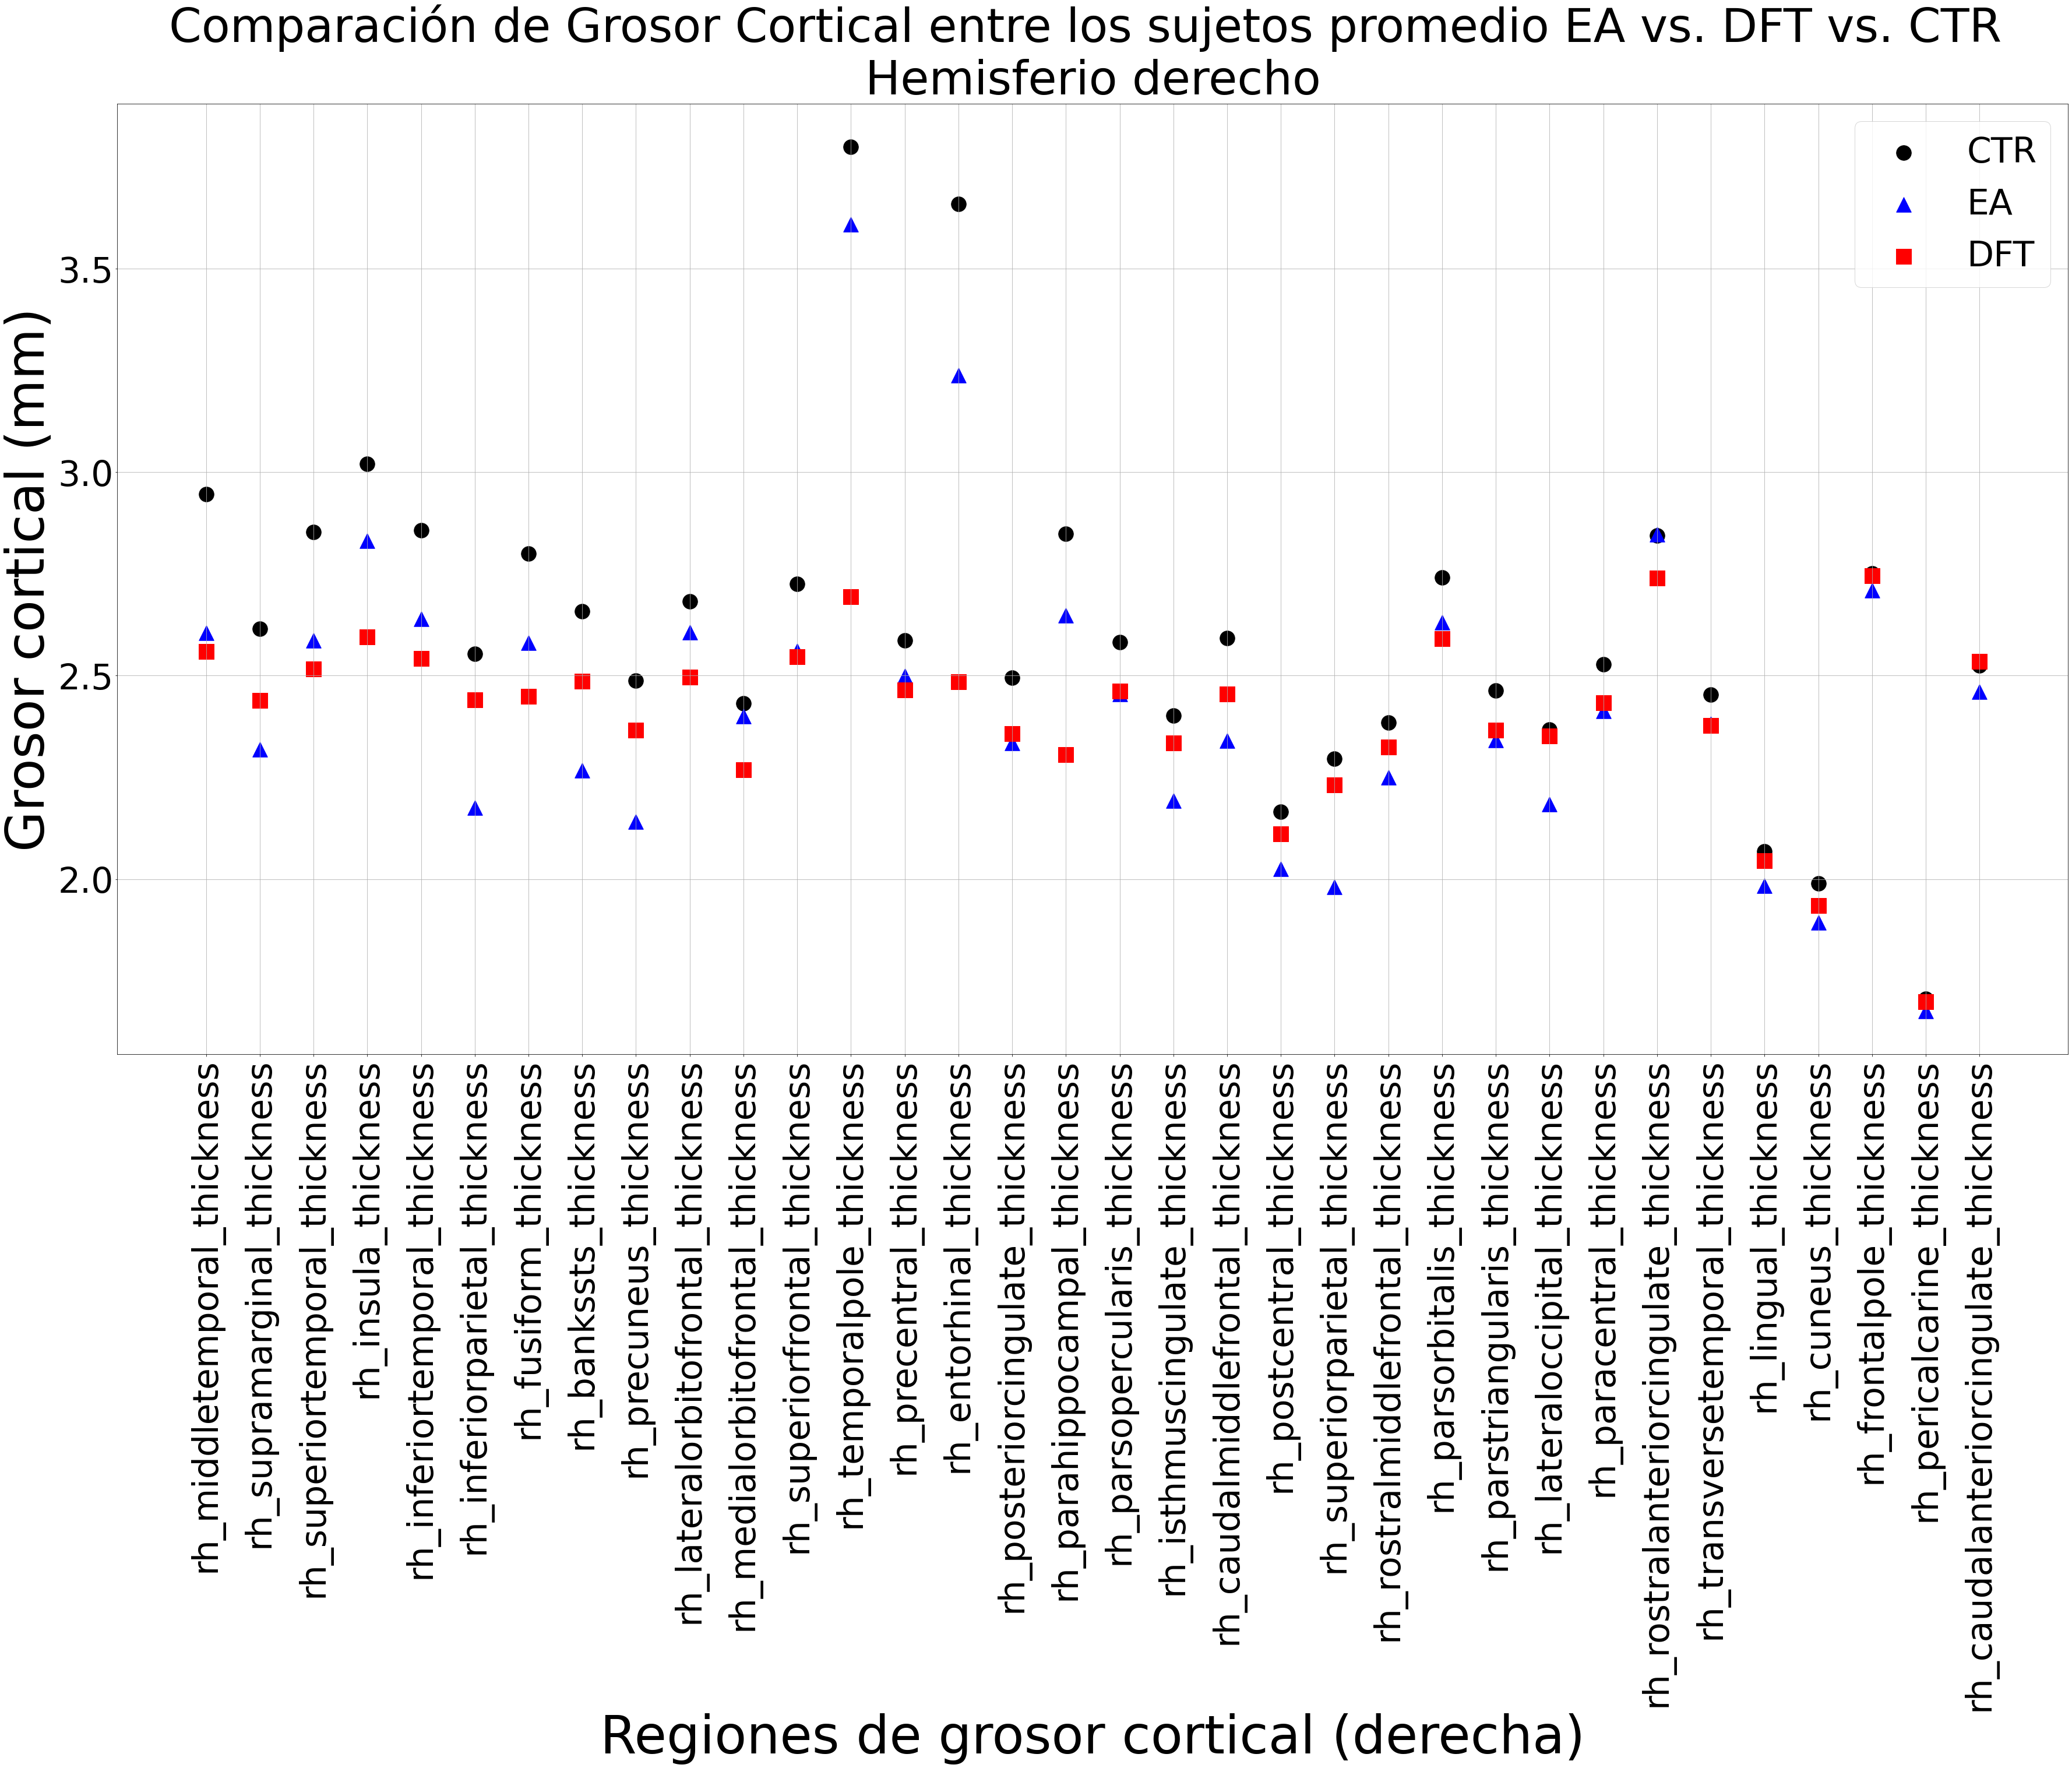

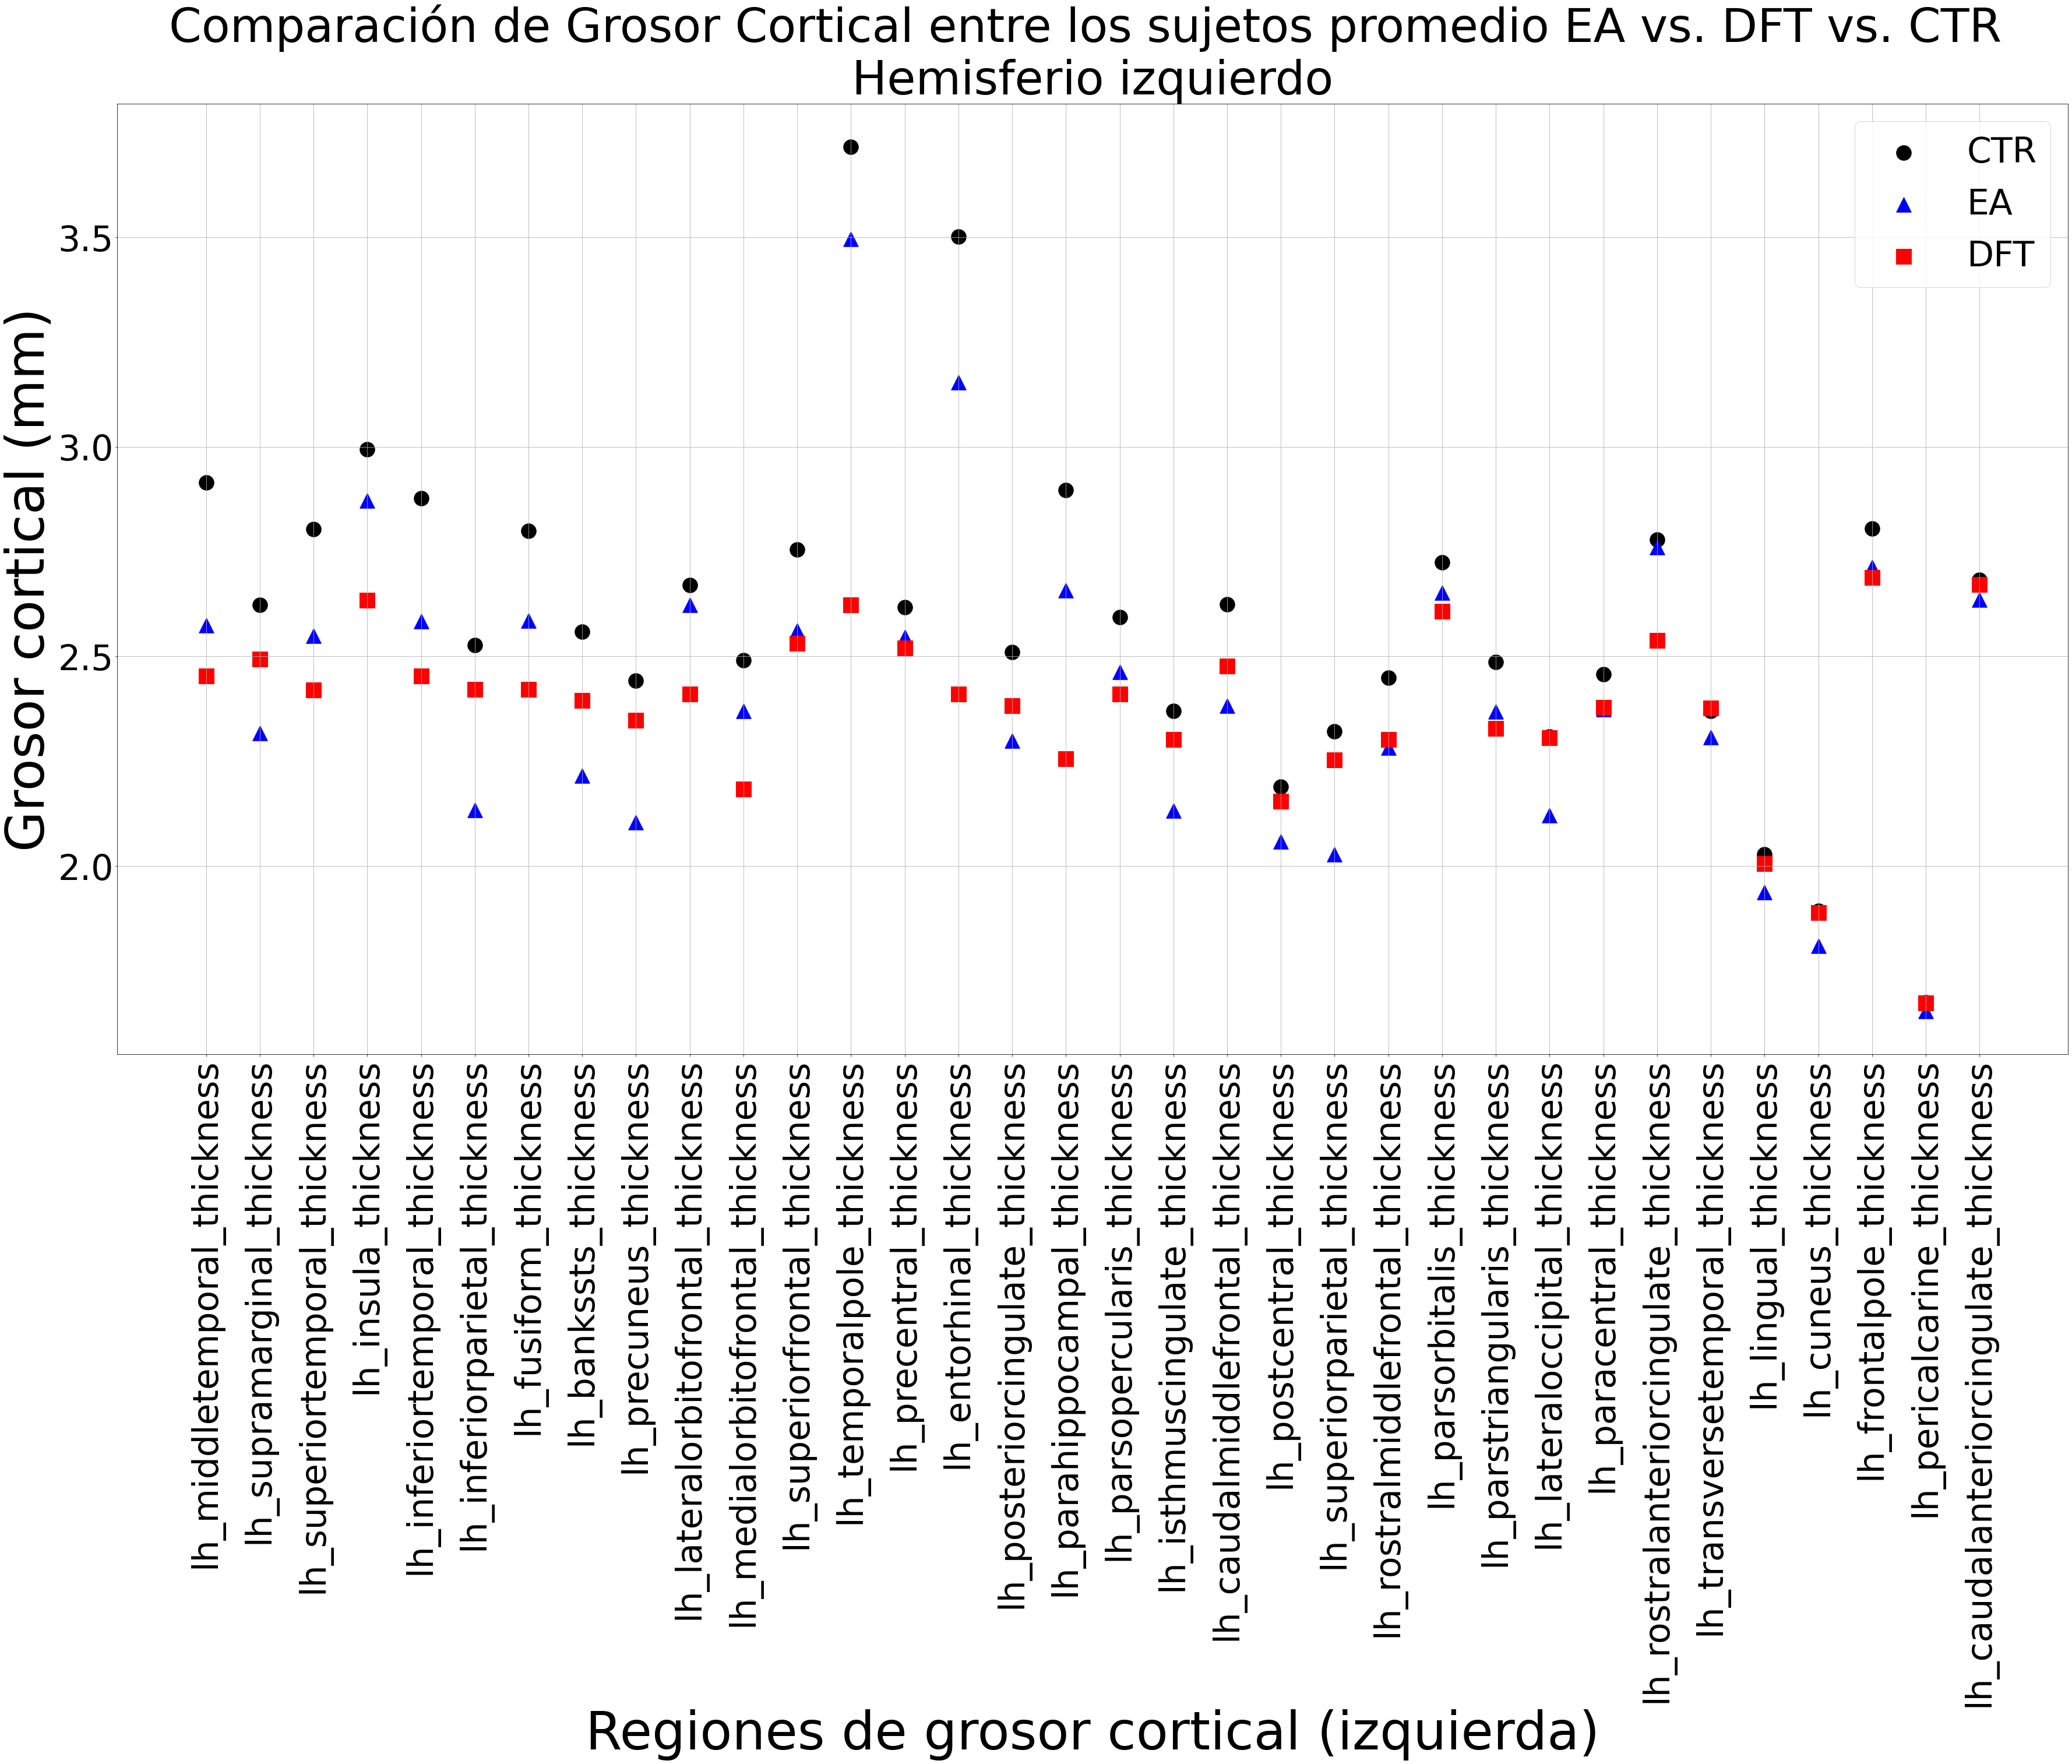

In [60]:
###################### PARTE DERECHA ######################
df_CTR_mean_thickness_values_RIGHT = df_CTR_mean_thickness_RIGHT.values
df_AD_mean_thickness_values_RIGHT = df_AD_mean_thickness_RIGHT.values
df_DFT_mean_thickness_values_RIGHT = df_DFT_mean_thickness_RIGHT.values

plt.rcParams['figure.figsize'] = [60, 30]
fig, ax = plt.subplots()
plt.title('Comparación de Grosor Cortical entre los sujetos promedio EA vs. DFT vs. CTR \nHemisferio derecho', fontsize=80)


plt.scatter(x = df_CTR_mean_thickness_RIGHT.columns,
            y = df_CTR_mean_thickness_values_RIGHT,
           c='black', s=650) # CTR


plt.scatter(x = df_AD_mean_thickness_RIGHT.columns,
            y = df_AD_mean_thickness_values_RIGHT,
           c='Blue', s=650, marker='^') #AD

plt.scatter(x = df_DFT_mean_thickness_RIGHT.columns,
            y = df_DFT_mean_thickness_values_RIGHT,
           c='red', s=650, marker='s') #DFT

ax.set_xlabel('Regiones de grosor cortical (derecha)', fontsize=90)
ax.set_ylabel('Grosor cortical (mm)', fontsize=90)
ax.set_xticks(sorted(set(df_CTR_mean_thickness_RIGHT.columns)))
ax.legend(['CTR', 'EA', 'DFT'], fontsize=60)
plt.xticks(rotation=90)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid()

plt.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/Mean-allClasses-CorticalThickness_RIGHT.jpg", dpi=400, bbox_inches='tight')
fig.show()


#################### PARTE IZQUIERDA ########################
df_CTR_mean_thickness_values_LEFT = df_CTR_mean_thickness_LEFT.values
df_AD_mean_thickness_values_LEFT = df_AD_mean_thickness_LEFT.values
df_DFT_mean_thickness_values_LEFT = df_DFT_mean_thickness_LEFT.values

plt.rcParams['figure.figsize'] = [60, 30]
fig, ax = plt.subplots()
plt.title('Comparación de Grosor Cortical entre los sujetos promedio EA vs. DFT vs. CTR \nHemisferio izquierdo', fontsize=80)


plt.scatter(x = df_CTR_mean_thickness_LEFT.columns,
            y = df_CTR_mean_thickness_values_LEFT,
           c='black', s=650) # CTR

plt.scatter(x = df_AD_mean_thickness_LEFT.columns,
            y = df_AD_mean_thickness_values_LEFT,
           c='Blue', s=650, marker='^') #AD

plt.scatter(x = df_DFT_mean_thickness_LEFT.columns,
            y = df_DFT_mean_thickness_values_LEFT,
           c='red', s=650, marker='s') #DFT

ax.set_xlabel('Regiones de grosor cortical (izquierda)', fontsize=70)
ax.set_ylabel('Grosor cortical (mm)', fontsize=70)
ax.set_xticks(sorted(set(df_CTR_mean_thickness_LEFT.columns)))
ax.legend(['CTR', 'EA', 'DFT'], fontsize=60)
plt.xticks(rotation=90)
plt.xticks(fontsize=60)
plt.yticks(fontsize=60)
plt.grid()

plt.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/Mean-allClasses-CorticalThickness_LEFT.jpg", dpi=400, bbox_inches='tight')
fig.show()

## 1.2.- Comparación de VOLÚMENES entre sujetos promedios AD / DFT / CTR

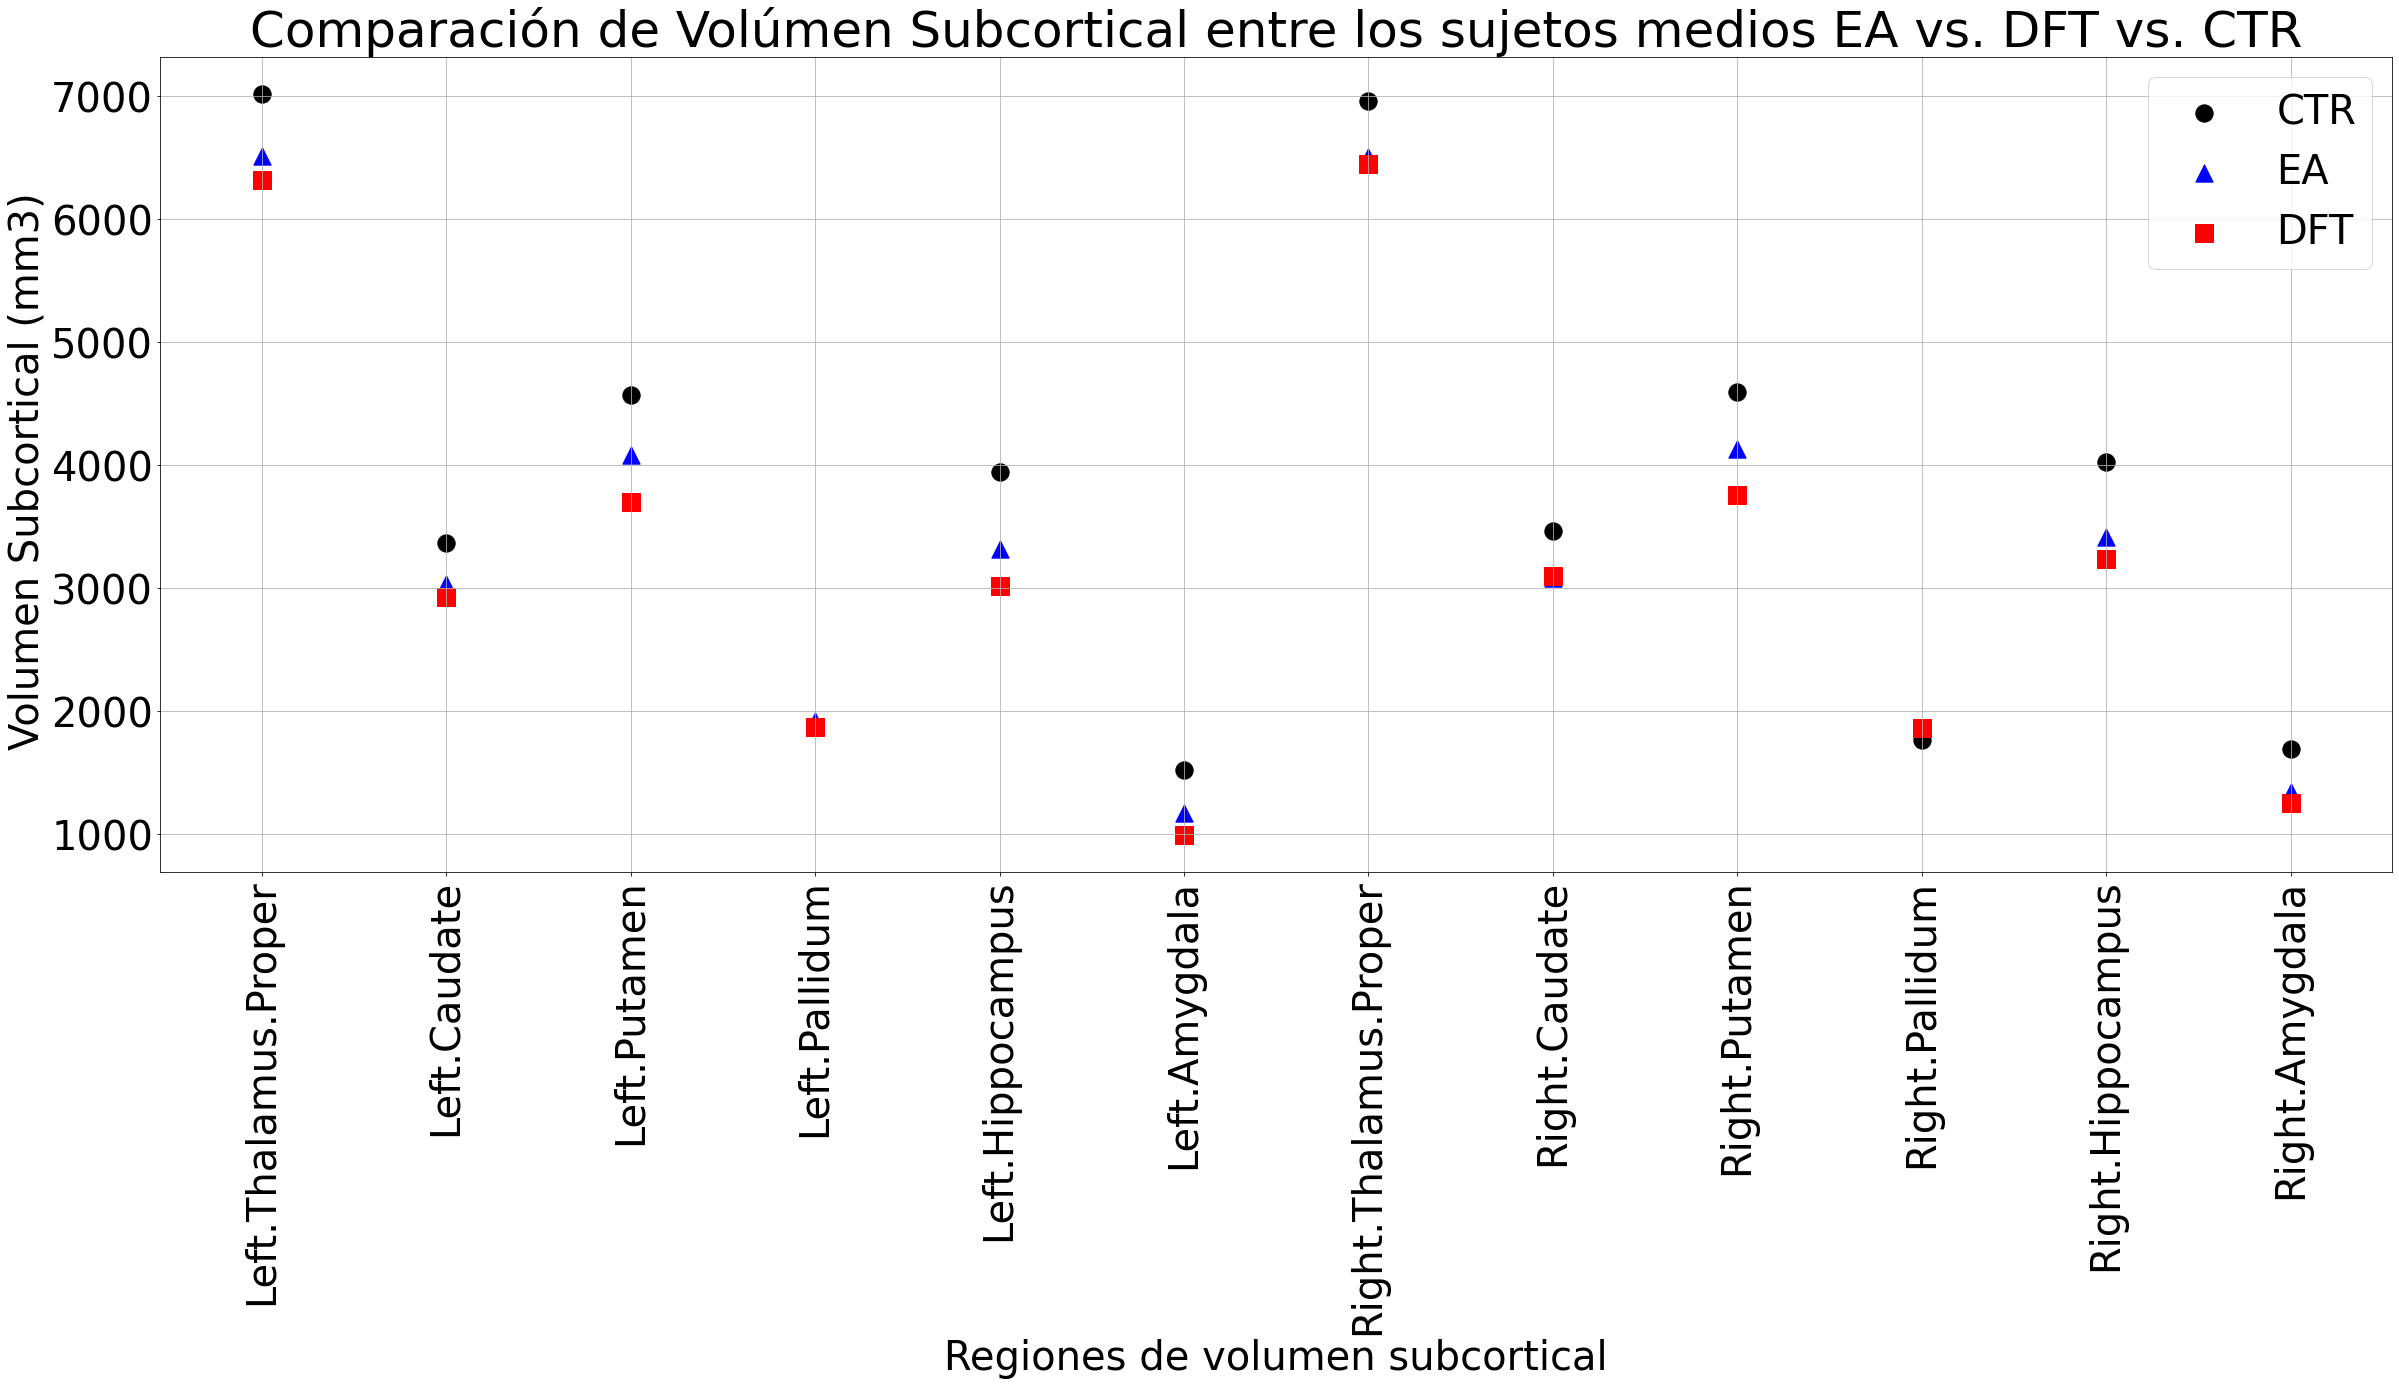

In [69]:
df_CTR_mean_volumes_values = df_CTR_mean_volumes.values
df_AD_mean_volumes_values = df_AD_mean_volumes.values
df_DFT_mean_volumes_values = df_DFT_mean_volumes.values

plt.rcParams['figure.figsize'] = [40, 15]
fig, ax = plt.subplots()
plt.title('Comparación de Volúmen Subcortical entre los sujetos medios EA vs. DFT vs. CTR', fontsize=50)

plt.scatter(x = df_CTR_mean_volumes.columns,
            y = df_CTR_mean_volumes_values,
           c='black', s=300)


plt.scatter(x = df_AD_mean_volumes.columns,
            y = df_AD_mean_volumes_values,
           c='blue', s=300, marker='^')


plt.scatter(x = df_DFT_mean_volumes.columns,
            y = df_DFT_mean_volumes_values,
           c='red', s=300, marker='s')



ax.set_xlabel('Regiones de volumen subcortical', fontsize=40)
ax.set_ylabel('Volumen Subcortical (mm3) ', fontsize=40)
ax.set_xticks(sorted(set(df_CTR_mean_volumes.columns)))
ax.legend(['CTR', 'EA', 'DFT'], fontsize=40)
plt.xticks(rotation=90)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

plt.grid()

plt.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/Mean-allClasses-Volumes.jpg", dpi=400, bbox_inches='tight')
fig.show()

In [63]:
df_DFT_mean_volumes_values

array([[6319.66666667, 2930.67575758, 3698.21515152, 1871.49090909,
        3016.43939394,  992.73939394, 6445.40909091, 3100.63030303,
        3755.64242424, 1860.31212121, 3240.04242424, 1251.08484848]])

# 2.- Análisis de sujetos mal clasificados

## 1.- Alzhéimer

In [22]:
df_NOTOK_AD = pd.read_csv("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/AD/df_NOTOK_AD.csv")
df_NOTOK_AD.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df_NOTOK_AD

ID Group Predict_Class   AD_prob  CTR_prob  DFT_prob  Sex  \
0   sub-0001_01    AD           CTR  0.171298  0.668187  0.160514    1   
1   sub-0002_01    AD           CTR  0.331023  0.500238  0.168739    0   
2   sub-0019_01    AD           DFT  0.217045  0.097765  0.685190    1   
3   sub-0042_01    AD           CTR  0.166991  0.673309  0.159700    0   
4   sub-0047_01    AD           DFT  0.424098  0.100957  0.474945    1   
5   sub-0053_01    AD           CTR  0.177355  0.660871  0.161774    1   
6   sub-0054_01    AD           CTR  0.176654  0.662350  0.160995    1   
7   sub-0055_01    AD           CTR  0.194252  0.642568  0.163179    0   
8   sub-0057_01    AD           CTR  0.182049  0.656092  0.161859    1   
9   sub-0058_01    AD           CTR  0.174765  0.664252  0.160983    0   
10  sub-0060_01    AD           CTR  0.407046  0.424639  0.168315    0   
11  sub-0062_01    AD           CTR  0.182216  0.655612  0.162171    1   
12  sub-0063_01    AD           CTR  0.172738  0.665277  0.161984    0   
13  sub-0135_01    AD           CTR  0.177111  0.662792  0.160097    0   
14  sub-0139_01    AD           CTR  0.173642  0.665160  0.161199    0   
15  sub-0194_01    AD           CTR  0.172421  0.665817  0.161762    0   
16  sub-0197_01    AD           CTR  0.173253  0.665601  0.161146    0   
17  sub-0368_01    AD           DFT  0.245520  0.099077  0.655403    1   

    Age_at_MRI  rh_middletemporal_thickness  rh_supramarginal_thickness  ...  \
0        50.40                        2.708                       2.485  ...   
1        54.50                        2.885                       2.554  ...   
2        56.10                        2.014                       2.148  ...   
3        64.62                        2.952                       2.508  ...   
4        63.90                        2.824                       2.418  ...   
5        31.00                        2.912                       2.692  ...   
6        37.00                        2.838                       2.438  ...   
7        43.00                        2.702                       2.455  ...   
8        46.30                        2.761                       2.669  ...   
9        47.20                        2.829                       2.345  ...   
10       55.00                        2.779                       2.342  ...   
11       50.00                        2.862                       2.481  ...   
12       60.00                        2.974                       2.713  ...   
13       62.90                        2.826                       2.386  ...   
14       59.40                        2.921                       2.498  ...   
15       61.79                        3.070                       2.752  ...   
16       58.43                        3.023                       2.691  ...   
17       61.68                        2.735                       2.469  ...   

    Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0             3568.7         1514.2                   8078.5   
1             3766.4         1232.9                  15697.9   
2             2954.8          949.5                  33048.4   
3             4185.3         1733.4                  27750.9   
4             2367.8          983.1                   5080.3   
5             3437.8         1276.1                   5413.3   
6             3984.6         1376.2                   8617.7   
7             3842.0         1290.3                   7022.3   
8             3836.8         1378.9                   5917.8   
9             3962.4         1550.8                  11669.5   
10            4461.0         1536.2                  14503.2   
11            3374.4         1302.3                  11529.2   
12            4226.9         1720.5                   8381.4   
13            3692.0         1323.9                   7643.4   
14            3006.1         1288.9                  10437.1   
15            3933.6         1280.8                  14959.7 

In [23]:
df_NOTOK_AD.groupby('Predict_Class').size().reset_index()

Predict_Class   0
0           CTR  15
1           DFT   3

#### Análisis de los Alzhéimers mal clasificados 
Vamos a vectorizar las columnas para poder realizar un **scatter plot**

1.- Primero lo hacemos con las **cortical thickness**

In [31]:
# ALZHÉIMERS no clasificados correctamente

# thickness RIGHT
df_AD_NOTOK_thickness_RIGHT = df_NOTOK_AD.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob',"lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

df_AD_OK_thickness_RIGHT = df_all_OK_AD.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI', 'AD_prob', 'CTR_prob', 'DFT_prob',"lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

# thickness LEFT
df_AD_NOTOK_thickness_LEFT = df_NOTOK_AD.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

df_AD_OK_thickness_LEFT = df_all_OK_AD.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI', 'AD_prob', 'CTR_prob', 'DFT_prob',"rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

Graficamos el **Paciente Alzéimer medio** y comparamos los valores de las **cortical thickness** y **volúmenes** de los sujetos mal clasificados, para obtener una visión general de laa variabilidad de sus valores.

### 1.1.- Distribución de GROSORES corticales de sujetos con Alzhéimer

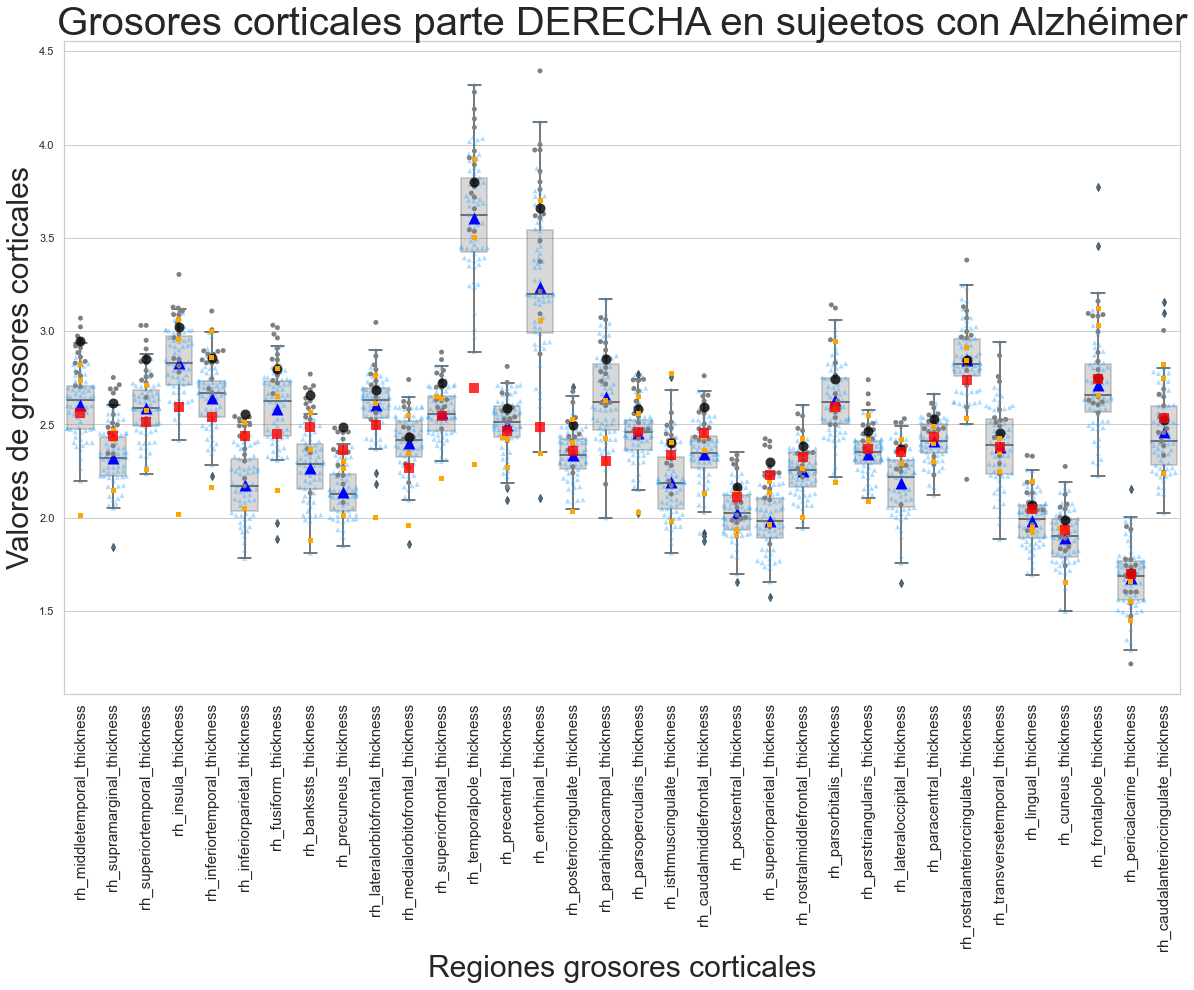

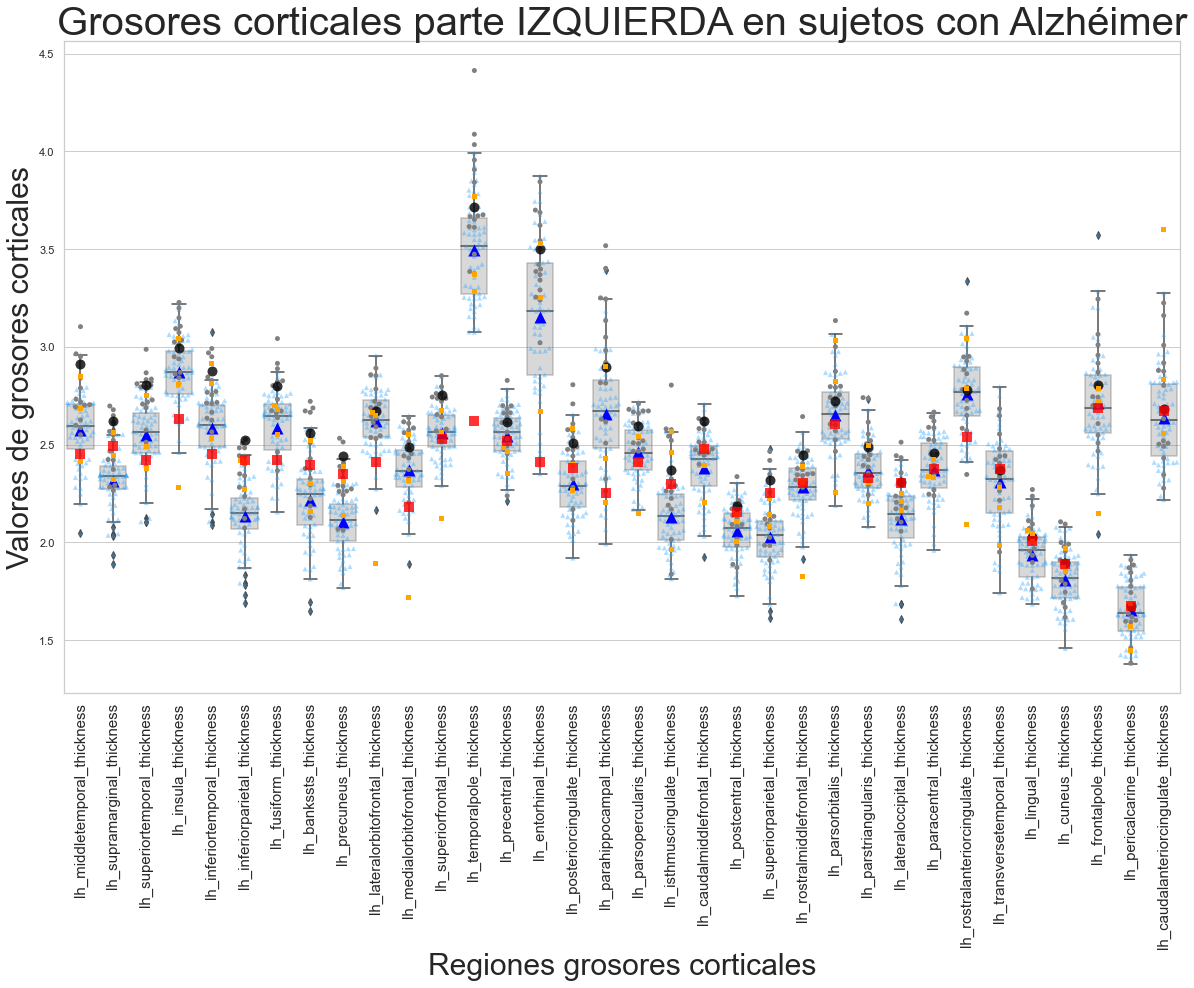

In [132]:
###################################### PARTE DERECHA #########################

sns.set(color_codes=True)
sns.set_style("whitegrid")
fig = matplotlib.figure(1, figsize=(20, 12))
                        
#sujetos alzhéimer bien clasificados
sns.swarmplot(data=df_AD_OK_thickness_RIGHT, color="#33A8FF", alpha=0.4, marker='^')
#sujeto promedio alzhéimer
sns.swarmplot(data=df_AD_mean_thickness_RIGHT, color='blue', s=12, marker='^')


# ALZHÉIMERS CLASIFICADOS COMO CONTROLES 
df_AD_NOTOK_thickness_RIGHT_CTR = df_AD_NOTOK_thickness_RIGHT[df_AD_NOTOK_thickness_RIGHT['Predict_Class']=='CTR']
df_AD_NOTOK_thickness_RIGHT_CTR = df_AD_NOTOK_thickness_RIGHT_CTR.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_AD_NOTOK_thickness_RIGHT_CTR, color='grey', alpha=1, marker='o', s=5)
# control promedio
sns.swarmplot(data=df_CTR_mean_thickness_RIGHT, color='black', alpha=0.8, marker='o', s=10)

# ALZHÉIMERS CLASIFICADOS COMO DEMENCIA FRONTOTEMPORAL 
df_AD_NOTOK_thickness_RIGHT_DFT = df_AD_NOTOK_thickness_RIGHT[df_AD_NOTOK_thickness_RIGHT['Predict_Class']=='DFT']
df_AD_NOTOK_thickness_RIGHT_DFT = df_AD_NOTOK_thickness_RIGHT_DFT.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_AD_NOTOK_thickness_RIGHT_DFT, color='orange', alpha=1, marker='s', s=5)
# control promedio
sns.swarmplot(data=df_DFT_mean_thickness_RIGHT, color='red', alpha=0.8, marker='s', s=10)

# bloxplot de los controles bien clasificados
ax = sns.boxplot(data=df_AD_OK_thickness_RIGHT, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Grosores corticales parte DERECHA en sujeetos con Alzhéimer', fontsize=40)
ax.set_xlabel(xlabel='Regiones grosores corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de grosores corticales', fontsize=30)
ax.set_xticklabels(df_AD_mean_thickness_RIGHT.columns, rotation=90, fontsize=15)
fig.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/AD/ADvsMalClass-CorticalThickness_RIGHT_2.jpg", dpi=400, bbox_inches='tight')
fig.show()


######################################### PARTE IZQUIERDA #####################################

sns.set(color_codes=True)
sns.set_style("whitegrid")
fig_2 = matplotlib.figure(2, figsize=(20, 12))
                        
#sujetos alzhéimer bien clasificados
sns.swarmplot(data=df_AD_OK_thickness_LEFT, color="#33A8FF", alpha=0.4, marker='^')
#sujeto promedio alzhéimer
sns.swarmplot(data=df_AD_mean_thickness_LEFT, color='blue', s=12, marker='^')

# ALZHÉIMERS CLASIFICADOS COMO CONTROLES 
df_AD_NOTOK_thickness_LEFT_CTR = df_AD_NOTOK_thickness_LEFT[df_AD_NOTOK_thickness_LEFT['Predict_Class']=='CTR']
df_AD_NOTOK_thickness_LEFT_CTR = df_AD_NOTOK_thickness_LEFT_CTR.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_AD_NOTOK_thickness_LEFT_CTR, color='grey', alpha=1, marker='o', s=5)
# control promedio
sns.swarmplot(data=df_CTR_mean_thickness_LEFT, color='black', alpha=0.8, marker='o', s=10)

# ALZHÉIMERS CLASIFICADOS COMO DEMENCIA FRONTOTEMPORAL 
df_AD_NOTOK_thickness_LEFT_DFT = df_AD_NOTOK_thickness_LEFT[df_AD_NOTOK_thickness_LEFT['Predict_Class']=='DFT']
df_AD_NOTOK_thickness_LEFT_DFT = df_AD_NOTOK_thickness_LEFT_DFT.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_AD_NOTOK_thickness_LEFT_DFT, color='orange', alpha=1, marker='s', s=5)
# control promedio
sns.swarmplot(data=df_DFT_mean_thickness_LEFT, color='red', alpha=0.8, marker='s', s=10)

# bloxplot de los grosores de alzhéimers bien clasificados
ax = sns.boxplot(data=df_AD_OK_thickness_LEFT, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Grosores corticales parte IZQUIERDA en sujetos con Alzhéimer', fontsize=40)
ax.set_xlabel(xlabel='Regiones grosores corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de grosores corticales', fontsize=30)
ax.set_xticklabels(df_AD_mean_thickness_LEFT.columns, rotation=90, fontsize=15)

fig_2.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/AD/ADvsMalClass-CorticalThickness_LEFT_2.jpg", dpi=400, bbox_inches='tight')
fig_2.show()

### 1.2.- Distribución de VOLÚMENES corticales de sujetos con Alzhéimer

Hemos eliminado de la lista de valores de los volúmenes corticales, los **volúmenes totales del cerebellum** (derecha e izquierdo) y de los **ventrículos** (derecho e izquierdo), ya que estaban en escalas diferentes no dejaba apreciar correctamente los valores de los demás componentes. 

In [82]:
# Volúmenes de sujetos Azhéimers mal clasificados
# Se han discriminado los valores de los ventrículos y el volumen total del cortex cerebellum 
df_AD_NOTOK_volumes = df_NOTOK_AD.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
'Left.Cerebellum.Cortex','Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex'], axis=1)

df_AD_OK_volumes = df_all_OK_AD.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
'Left.Cerebellum.Cortex','Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex'], axis=1)

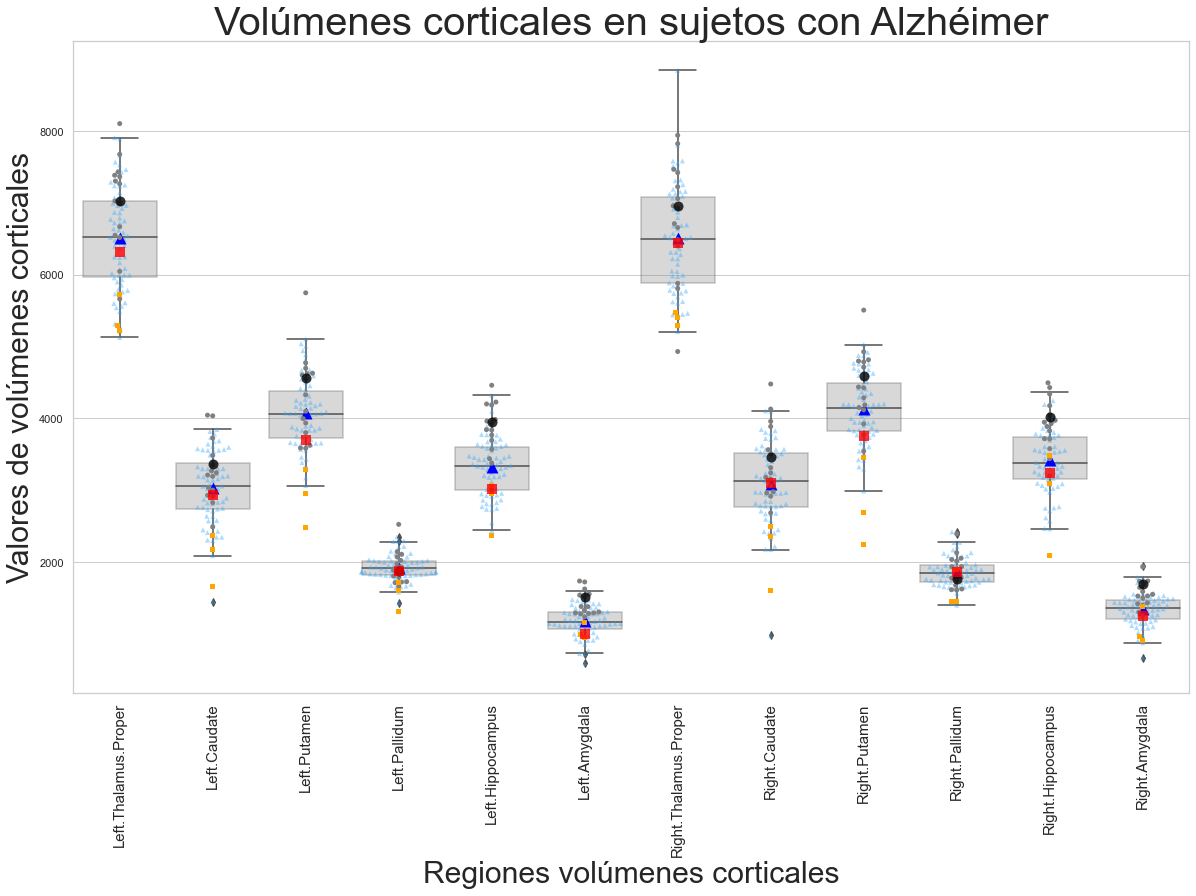

In [131]:
sns.set(color_codes=True)
sns.set_style("whitegrid")
fig = matplotlib.figure(2, figsize=(20, 12))
                        
#sujetos alzhéimer bien clasificados
df_AD_OK_volumes_values = df_AD_OK_volumes.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_AD_OK_volumes_values, color="#33A8FF", alpha=0.4, marker='^')
#sujeto promedio alzhéimer
sns.swarmplot(data=df_AD_mean_volumes, color='blue', s=12, marker='^')

# ALZHÉIMERS CLASIFICADOS COMO CONTROLES 
df_AD_NOTOK_volumes_CTR = df_AD_NOTOK_volumes[df_AD_NOTOK_volumes['Predict_Class']=='CTR']
df_AD_NOTOK_volumes_CTR = df_AD_NOTOK_volumes_CTR.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_AD_NOTOK_volumes_CTR, color='grey', alpha=1, marker='o', s=5)
# control promedio
sns.swarmplot(data=df_CTR_mean_volumes, color='black', alpha=0.8, marker='o', s=10)

# ALZHÉIMERS CLASIFICADOS COMO DEMENCIA FRONTOTEMPORAL 
df_AD_NOTOK_volumes_DFT = df_AD_NOTOK_volumes[df_AD_NOTOK_volumes['Predict_Class']=='DFT']
df_AD_NOTOK_volumes_DFT = df_AD_NOTOK_volumes_DFT.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_AD_NOTOK_volumes_DFT, color='orange', alpha=1, marker='s', s=5)
# control promedio
sns.swarmplot(data=df_DFT_mean_volumes, color='red', alpha=0.8, marker='s', s=10)

# bloxplot de los valores de alzhéimers bien clasificados
ax = sns.boxplot(data=df_AD_OK_volumes_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Volúmenes corticales en sujetos con Alzhéimer', fontsize=40)
ax.set_xlabel(xlabel='Regiones volúmenes corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de volúmenes corticales', fontsize=30)
ax.set_xticklabels(df_AD_mean_volumes.columns, rotation=90, fontsize=15)

fig.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/AD/ADvsMalClass-Volumes_2.jpg", dpi=400, bbox_inches='tight')
fig.show()

## 2.- Demencia Frontotemporal

In [16]:
df_NOTOK_DFT = pd.read_csv("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/DFT/df_NOTOK_DFT.csv")
df_NOTOK_DFT.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df_NOTOK_DFT

ID Group Predict_Class   AD_prob  CTR_prob  DFT_prob  Sex  \
0   sub-0110_01   DFT            AD  0.741541  0.091807  0.166652    0   
1   sub-0112_01   DFT            AD  0.741963  0.091845  0.166192    1   
2   sub-0113_01   DFT            AD  0.741370  0.091959  0.166671    0   
3   sub-0117_01   DFT            AD  0.505969  0.102905  0.391125    1   
4   sub-0118_01   DFT            AD  0.618268  0.096320  0.285412    0   
5   sub-0123_01   DFT           CTR  0.177967  0.665687  0.156346    0   
6   sub-0124_01   DFT            AD  0.686465  0.144644  0.168891    0   
7   sub-0125_01   DFT           CTR  0.193238  0.648919  0.157843    1   
8   sub-0212_01   DFT           CTR  0.176379  0.670597  0.153024    0   
9   sub-0213_01   DFT           CTR  0.175946  0.670424  0.153630    1   
10  sub-0216_01   DFT            AD  0.717950  0.115451  0.166599    1   
11  sub-0218_01   DFT            AD  0.676627  0.156451  0.166921    1   
12  sub-0219_01   DFT            AD  0.744527  0.091696  0.163777    0   
13  sub-0221_01   DFT           CTR  0.179080  0.663435  0.157485    1   
14  sub-0226_01   DFT            AD  0.737049  0.091970  0.170981    0   
15  sub-0228_01   DFT            AD  0.738827  0.091667  0.169506    0   
16  sub-0230_01   DFT            AD  0.743967  0.091545  0.164489    0   
17  sub-0235_01   DFT           CTR  0.237492  0.600250  0.162258    1   
18  sub-0238_01   DFT           CTR  0.281657  0.554069  0.164274    0   
19  sub-0246_01   DFT           CTR  0.177908  0.666700  0.155392    1   
20  sub-0249_01   DFT           CTR  0.176588  0.668046  0.155366    0   
21  sub-0250_01   DFT           CTR  0.176474  0.669210  0.154316    0   
22  sub-0254_01   DFT           CTR  0.269318  0.566234  0.164448    0   
23  sub-0267_01   DFT           CTR  0.205089  0.636509  0.158402    0   

    Age_at_MRI  rh_middletemporal_thickness  rh_supramarginal_thickness  ...  \
0        53.20                        2.545                       2.342  ...   
1        60.70                        3.009                       2.445  ...   
2        49.00                        2.839                       2.326  ...   
3        53.70                        2.953                       2.492  ...   
4        64.00                        2.458                       2.119  ...   
5        60.00                        2.619                       2.439  ...   
6        64.80                        2.900                       2.651  ...   
7        63.80                        2.805                       2.501  ...   
8        60.73                        2.984                       2.562  ...   
9        59.66                        2.934                       2.606  ...   
10       56.73                        2.966                       2.586  ...   
11       59.26                        2.959                       2.405  ...   
12       63.05                        2.838                       2.510  ...   
13       60.31                        2.742                       2.443  ...   
14       52.77                        2.629                       2.372  ...   
15       54.32                        2.957                       2.529  ...   
16       56.16                        2.781                       2.411  ...   
17       56.41                        2.933                       2.333  ...   
18       59.81                        2.865                       2.529  ...   
19       56.18                        2.984                       2.666  ...   
20       55.57                        2.963                       2.596  ...   
21       54.37                        3.087                       2.660  ...   
22       56.62                        2.838                       2.235  ...   
23       50.81                        2.859                       2.437  ...   

    Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0             2963.3         1112.4                   9139.9   
1             3050.2         1212

In [17]:
df_NOTOK_DFT.groupby('Predict_Class').size().reset_index()

Predict_Class   0
0            AD  12
1           CTR  12

## 2.- Demencia Frontotemporal

### 2.1.- Distribución de GROSORES corticales de sujetos con Demencia Frontotemporal

In [117]:
# DEMENCIA FRONTOTEMPORAL no clasificados correctamente

# thickness RIGHT
df_DFT_NOTOK_thickness_RIGHT = df_NOTOK_DFT.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob',"lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)


df_DFT_OK_thickness_RIGHT = df_all_OK_DFT.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob',"lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

# thickness LEFT
df_DFT_NOTOK_thickness_LEFT = df_NOTOK_DFT.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)


df_DFT_OK_thickness_LEFT = df_all_OK_DFT.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)


Graficamos el **Paciente Demencia Frontotemporal medio** y comparamos los valores de las **cortical thickness** y **volúmenes** de los sujetos mal clasificados, para obtener una visión general de laa variabilidad de sus valores.

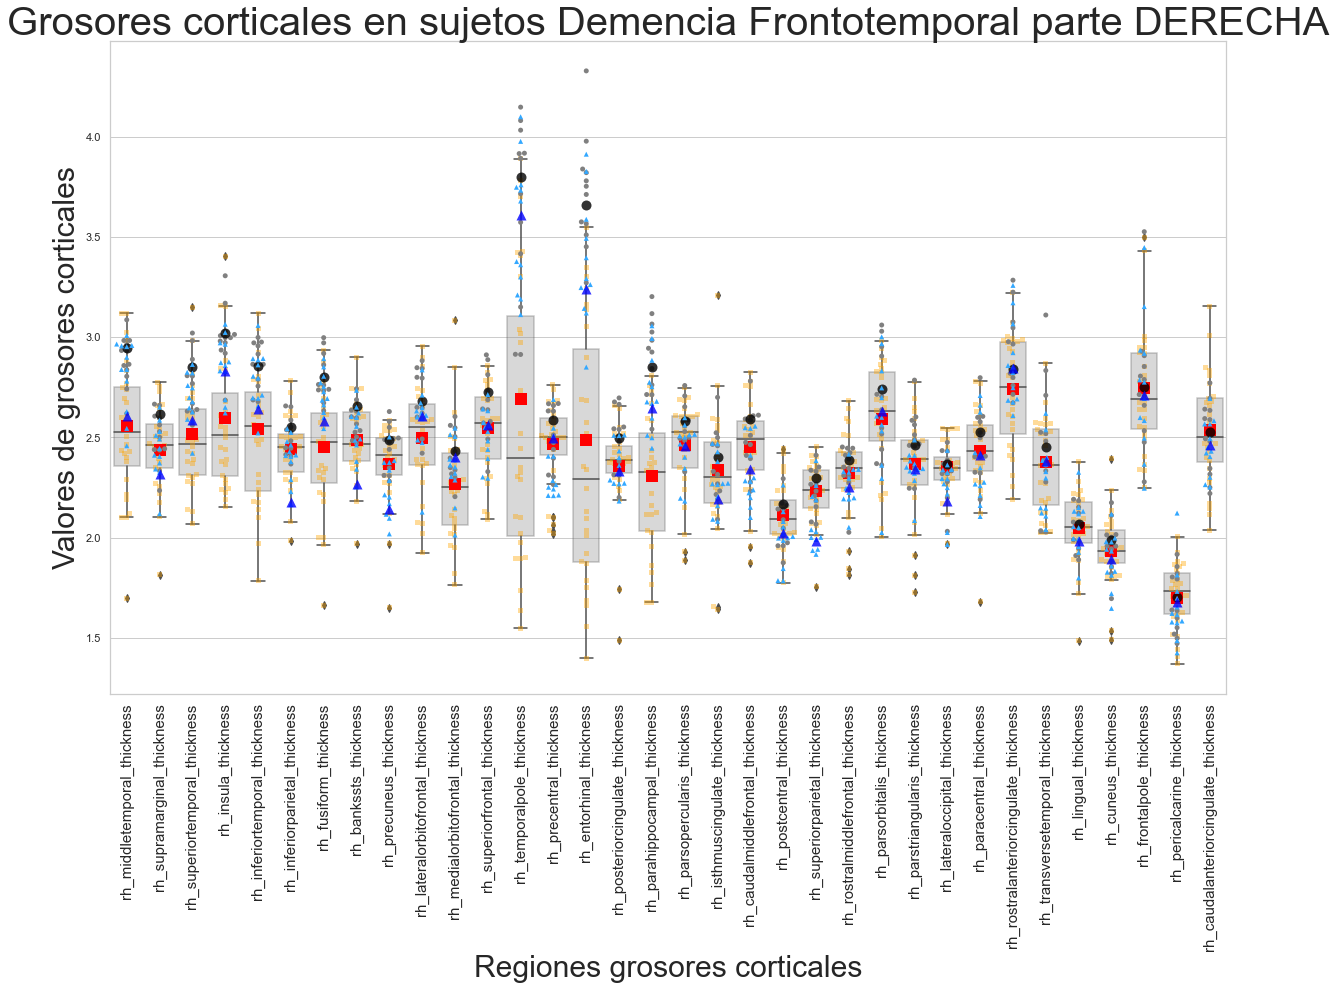

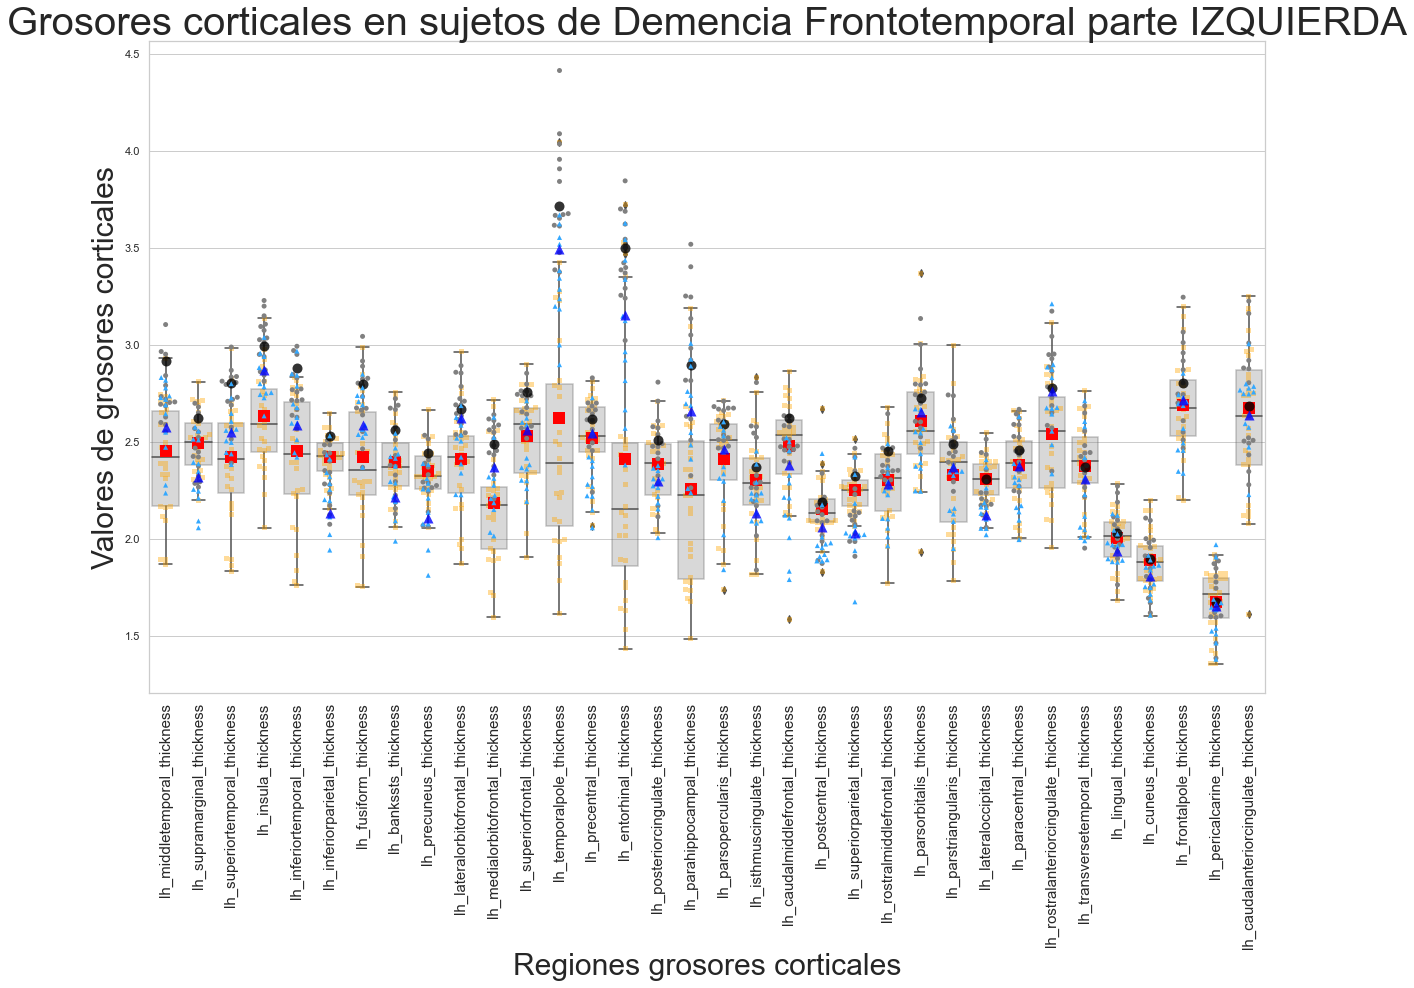

In [130]:
###################################### PARTE DERECHA #########################

sns.set(color_codes=True)
sns.set_style("whitegrid")
fig = matplotlib.figure(1, figsize=(20, 12))

df_DFT_OK_thickness_RIGHT_values = df_DFT_OK_thickness_RIGHT.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
                        
#sujetos DEMENCIA FRONTOTEMPORAL bien clasificados
sns.swarmplot(data=df_DFT_OK_thickness_RIGHT_values, color="orange", alpha=0.4, marker='s')
#sujeto promedio DEMENCIA FRONTOTEMPORAL
sns.swarmplot(data=df_DFT_mean_thickness_RIGHT, color='red', s=12, marker='s')


# DEMENCIA FRONTOTEMPORAL CLASIFICADOS COMO CONTROLES 
df_DFT_NOTOK_thickness_RIGHT_CTR = df_DFT_NOTOK_thickness_RIGHT[df_DFT_NOTOK_thickness_RIGHT['Predict_Class']=='CTR']
df_DFT_NOTOK_thickness_RIGHT_CTR = df_DFT_NOTOK_thickness_RIGHT_CTR.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_DFT_NOTOK_thickness_RIGHT_CTR, color='grey', alpha=1, marker='o', s=5)
# control promedio
sns.swarmplot(data=df_CTR_mean_thickness_RIGHT, color='black', alpha=0.8, marker='o', s=10)

# DEMECIA FRONTOTEMPORAL CLASIFICADOS COMO ALZHÉIMERS 
df_DFT_NOTOK_thickness_RIGHT_AD = df_DFT_NOTOK_thickness_RIGHT[df_DFT_NOTOK_thickness_RIGHT['Predict_Class']=='AD']
df_DFT_NOTOK_thickness_RIGHT_AD = df_DFT_NOTOK_thickness_RIGHT_AD.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_DFT_NOTOK_thickness_RIGHT_AD, color='#33A8FF', alpha=1, marker='^', s=5)
# control promedio
sns.swarmplot(data=df_AD_mean_thickness_RIGHT, color='blue', alpha=0.8, marker='^', s=10)

# bloxplot de los controles bien clasificados
ax = sns.boxplot(data=df_DFT_OK_thickness_RIGHT_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Grosores corticales en sujetos Demencia Frontotemporal parte DERECHA', fontsize=40)
ax.set_xlabel(xlabel='Regiones grosores corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de grosores corticales', fontsize=30)
ax.set_xticklabels(df_DFT_mean_thickness_RIGHT.columns, rotation=90, fontsize=15)
fig.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/DFT/DFTvsMalClass-CorticalThickness_RIGHT_2.jpg", dpi=400, bbox_inches='tight')
fig.show()


######################################### PARTE IZQUIERDA #####################################

sns.set(color_codes=True)
sns.set_style("whitegrid")
fig_2 = matplotlib.figure(2, figsize=(20, 12))

df_DFT_OK_thickness_LEFT_values = df_DFT_OK_thickness_LEFT.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
                        
#sujetos alzhéimer bien clasificados
sns.swarmplot(data=df_DFT_OK_thickness_LEFT_values, color="orange", alpha=0.4, marker='s')
#sujeto promedio alzhéimer
sns.swarmplot(data=df_DFT_mean_thickness_LEFT, color='red', s=12, marker='s')

# DEMENCIA FRONTOTEMPORAL CLASIFICADOS COMO CONTROLES 
df_DFT_NOTOK_thickness_LEFT_CTR = df_DFT_NOTOK_thickness_LEFT[df_DFT_NOTOK_thickness_LEFT['Predict_Class']=='CTR']
df_DFT_NOTOK_thickness_LEFT_CTR = df_DFT_NOTOK_thickness_LEFT_CTR.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_AD_NOTOK_thickness_LEFT_CTR, color='grey', alpha=1, marker='o', s=5)
# control promedio
sns.swarmplot(data=df_CTR_mean_thickness_LEFT, color='black', alpha=0.8, marker='o', s=10)

# DEMENCIA FRONTOTEMPORAL CLASIFICADOS COMO ALZHÉIMERS 
df_DFT_NOTOK_thickness_LEFT_AD = df_DFT_NOTOK_thickness_LEFT[df_DFT_NOTOK_thickness_LEFT['Predict_Class']=='AD']
df_DFT_NOTOK_thickness_LEFT_AD = df_DFT_NOTOK_thickness_LEFT_AD.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_DFT_NOTOK_thickness_LEFT_AD, color='#33A8FF', alpha=1, marker='^', s=5)
# control promedio
sns.swarmplot(data=df_AD_mean_thickness_LEFT, color='blue', alpha=0.8, marker='^', s=10)

# bloxplot de los grosores de alzhéimers bien clasificados
ax = sns.boxplot(data=df_DFT_OK_thickness_LEFT_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Grosores corticales en sujetos de Demencia Frontotemporal parte IZQUIERDA', fontsize=40)
ax.set_xlabel(xlabel='Regiones grosores corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de grosores corticales', fontsize=30)
ax.set_xticklabels(df_DFT_mean_thickness_LEFT.columns, rotation=90, fontsize=15)

fig_2.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/DFT/DFTvsMalClass-CorticalThickness_LEFT_2.jpg", dpi=400, bbox_inches='tight')
fig_2.show()

### 2.1.- Distribución de VOLÚMENES corticales de sujetos con Demencia Frontotemporal

In [133]:
df_DFT_NOTOK_volumes = df_NOTOK_DFT.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness",'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex','Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex'], axis=1)

df_DFT_OK_volumes = df_all_OK_DFT.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness",'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex','Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex'], axis=1)


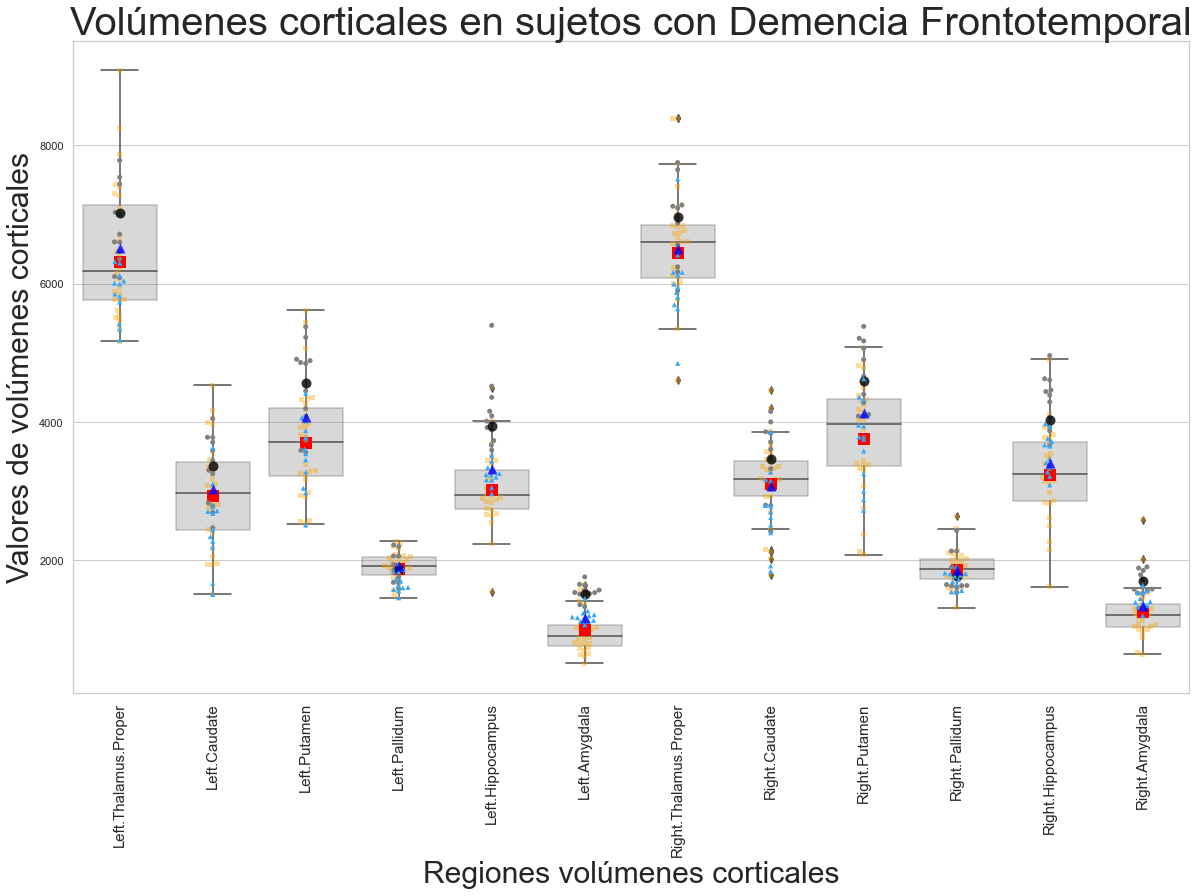

In [135]:
sns.set(color_codes=True)
sns.set_style("whitegrid")
fig = matplotlib.figure(2, figsize=(20, 12))
                        
#sujetos DEMECIA FRONTOTEMPORAL bien clasificados
df_DFT_OK_volumes_values = df_DFT_OK_volumes.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_DFT_OK_volumes_values, color="orange", alpha=0.4, marker='s')
#sujeto promedio alzhéimer
sns.swarmplot(data=df_DFT_mean_volumes, color='red', s=12, marker='s')

# DEMECIA FRONTOTEMPORTAL CLASIFICADOS COMO CONTROLES 
df_DFT_NOTOK_volumes_CTR = df_DFT_NOTOK_volumes[df_DFT_NOTOK_volumes['Predict_Class']=='CTR']
df_DFT_NOTOK_volumes_CTR = df_DFT_NOTOK_volumes_CTR.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_DFT_NOTOK_volumes_CTR, color='grey', alpha=1, marker='o', s=5)
# control promedio
sns.swarmplot(data=df_CTR_mean_volumes, color='black', alpha=0.8, marker='o', s=10)

# DEMENCIA FRONTOTEMPORAL CLASIFICADOS COMO ALZHÉIMERS 
df_DFT_NOTOK_volumes_AD = df_DFT_NOTOK_volumes[df_DFT_NOTOK_volumes['Predict_Class']=='AD']
df_DFT_NOTOK_volumes_AD = df_DFT_NOTOK_volumes_AD.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_DFT_NOTOK_volumes_AD, color='#33A8FF', alpha=1, marker='^', s=5)
# control promedio
sns.swarmplot(data=df_AD_mean_volumes, color='blue', alpha=0.8, marker='^', s=10)

# bloxplot de los valores de alzhéimers bien clasificados
ax = sns.boxplot(data=df_DFT_OK_volumes_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Volúmenes corticales en sujetos con Demencia Frontotemporal', fontsize=40)
ax.set_xlabel(xlabel='Regiones volúmenes corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de volúmenes corticales', fontsize=30)
ax.set_xticklabels(df_AD_mean_volumes.columns, rotation=90, fontsize=15)

fig.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/DFT/DFTvsMalClass-Volumes_2.jpg", dpi=400, bbox_inches='tight')
fig.show()

## 3.- Controles

In [140]:
df_NOTOK_CTR = pd.read_csv("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/CTR/df_NOTOK_CTR.csv")
df_NOTOK_CTR.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df_NOTOK_CTR

ID Group Predict_Class   AD_prob  CTR_prob  DFT_prob  Sex  \
0  sub-0106_01   CTR            AD  0.718782  0.091362  0.189857    1   
1  sub-0107_01   CTR            AD  0.715340  0.092620  0.192041    0   
2  sub-0108_01   CTR           DFT  0.210808  0.106882  0.682311    0   
3  sub-0164_01   CTR           DFT  0.341943  0.089769  0.568287    1   
4  sub-0190_01   CTR            AD  0.745373  0.085039  0.169588    1   

   Age_at_MRI  rh_middletemporal_thickness  rh_supramarginal_thickness  ...  \
0       62.94                        2.795                       2.537  ...   
1       63.28                        2.565                       2.296  ...   
2       63.95                        2.947                       2.355  ...   
3       48.70                        2.852                       2.577  ...   
4       59.48                        2.558                       2.559  ...   

   Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0            3727.5         1360.5                  19110.7   
1            3555.5         1440.8                  23991.7   
2            3337.5         1603.6                  44372.0   
3            3139.4          955.1                  15424.0   
4            3227.1         1220.4                   5183.6   

   Right.Cerebellum.Cortex  Right.Thalamus.Proper  Right.Caudate  \
0                  55758.6                 6273.3         3796.3   
1                  45716.1                 7167.0         3773.8   
2                  57285.7                 6536.4         4815.9   
3                  45572.7                 5923.8         3312.6   
4                  43788.5                 5659.5         3021.0   

   Right.Putamen  Right.Pallidum  Right.Hippocampus  Right.Amygdala  
0         4690.6          2008.7             4280.2          1393.5  
1         4270.6          2079.7             3546.1          1662.7  
2         5345.3          2028.7             3766.4          1720.7  
3         3901.0          1934.1             3476.5          1341.3  
4         4169.4          1395.0             3352.9          1574.0  

[5 rows x 92 columns]

In [141]:
df_NOTOK_CTR.groupby('Predict_Class').size().reset_index()

Predict_Class  0
0            AD  3
1           DFT  2

In [142]:
# CONTROLES no clasificados correctamente

# thickness RIGHT
df_CTR_NOTOK_thickness_RIGHT = df_NOTOK_CTR.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob',"lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

df_CTR_OK_thickness_RIGHT = df_all_OK_CTR.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob',"lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

# thickness LEFT
df_CTR_NOTOK_thickness_LEFT = df_NOTOK_CTR.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)

df_CTR_OK_thickness_LEFT = df_all_OK_CTR.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness", 'Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex',
 'Left.Thalamus.Proper',
 'Left.Caudate',
 'Left.Putamen',
 'Left.Pallidum',
 'Left.Hippocampus',
 'Left.Amygdala',
 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex',
 'Right.Thalamus.Proper',
 'Right.Caudate',
 'Right.Putamen',
 'Right.Pallidum',
 'Right.Hippocampus',
 'Right.Amygdala'], axis=1)


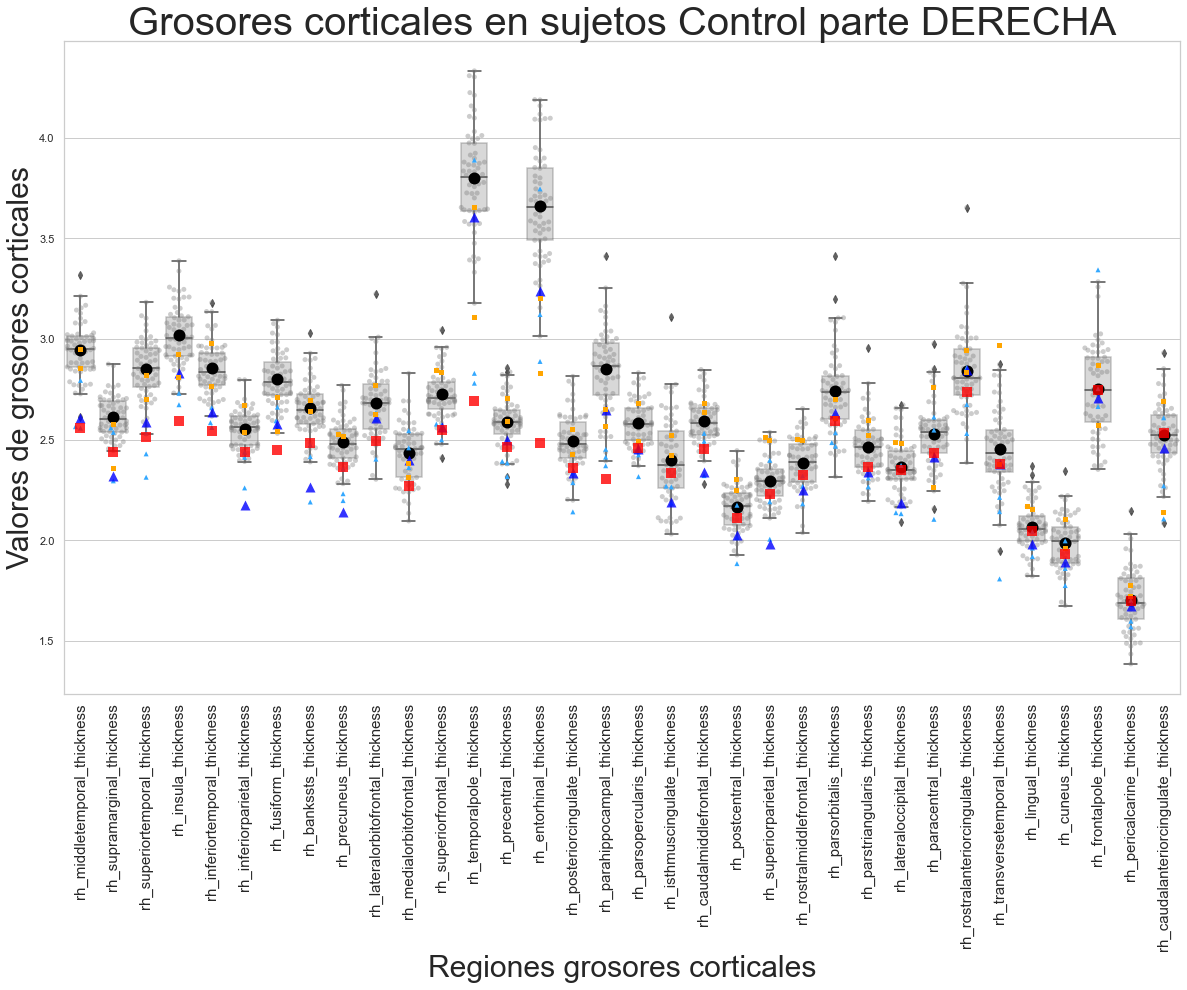

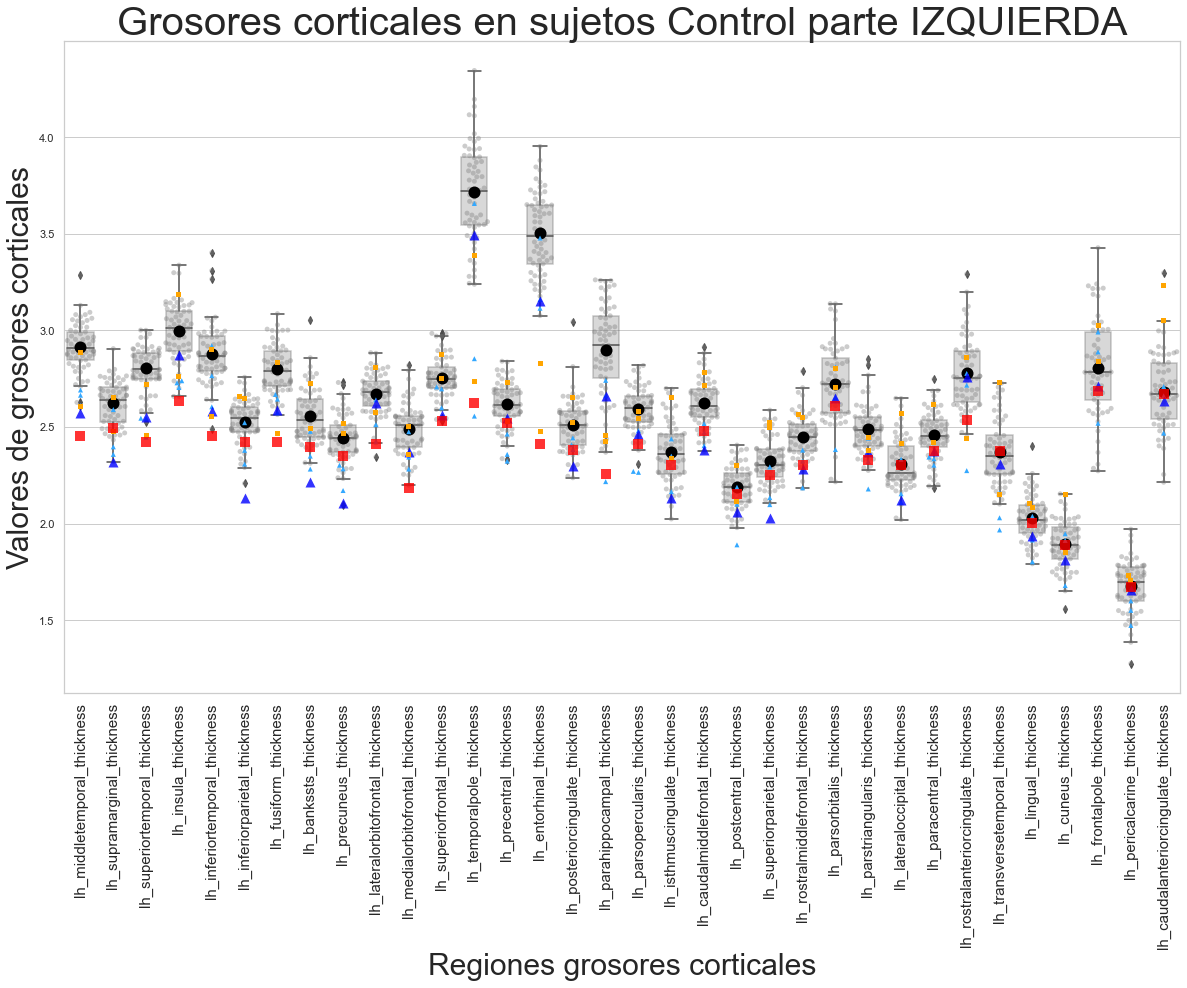

In [143]:
###################################### PARTE DERECHA #########################

sns.set(color_codes=True)
sns.set_style("whitegrid")
fig = matplotlib.figure(1, figsize=(20, 12))

df_CTR_OK_thickness_RIGHT_values = df_CTR_OK_thickness_RIGHT.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
                        
#sujetos CONTROLES bien clasificados
sns.swarmplot(data=df_CTR_OK_thickness_RIGHT_values, color="grey", alpha=0.4, marker='o')
#sujeto promedio DEMENCIA FRONTOTEMPORAL
sns.swarmplot(data=df_CTR_mean_thickness_RIGHT, color='black', s=12, marker='o')


# CONTROLES CLASIFICADOS COMO ALZHÉIMERS 
df_CTR_NOTOK_thickness_RIGHT_AD = df_CTR_NOTOK_thickness_RIGHT[df_CTR_NOTOK_thickness_RIGHT['Predict_Class']=='AD']
df_CTR_NOTOK_thickness_RIGHT_AD = df_CTR_NOTOK_thickness_RIGHT_AD.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_CTR_NOTOK_thickness_RIGHT_AD, color='#33A8FF', alpha=1, marker='^', s=5)
# alzhéimer promedio
sns.swarmplot(data=df_AD_mean_thickness_RIGHT, color='blue', alpha=0.8, marker='^', s=10)

# CONTROLES CLASIFICADOS COMO DEMENCIA FRONTOTEMPORAL 
df_CTR_NOTOK_thickness_RIGHT_DFT = df_CTR_NOTOK_thickness_RIGHT[df_CTR_NOTOK_thickness_RIGHT['Predict_Class']=='DFT']
df_CTR_NOTOK_thickness_RIGHT_DFT = df_CTR_NOTOK_thickness_RIGHT_DFT.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_CTR_NOTOK_thickness_RIGHT_DFT, color='orange', alpha=1, marker='s', s=5)
# control promedio
sns.swarmplot(data=df_DFT_mean_thickness_RIGHT, color='red', alpha=0.8, marker='s', s=10)

# bloxplot de los controles bien clasificados
ax = sns.boxplot(data=df_CTR_OK_thickness_RIGHT_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Grosores corticales en sujetos Control parte DERECHA', fontsize=40)
ax.set_xlabel(xlabel='Regiones grosores corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de grosores corticales', fontsize=30)
ax.set_xticklabels(df_DFT_mean_thickness_RIGHT.columns, rotation=90, fontsize=15)
fig.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/CTR/CTRvsMalClass-CorticalThickness_RIGHT_2.jpg", dpi=400, bbox_inches='tight')
fig.show()


######################################### PARTE IZQUIERDA #####################################

sns.set(color_codes=True)
sns.set_style("whitegrid")
fig_2 = matplotlib.figure(2, figsize=(20, 12))

df_CTR_OK_thickness_LEFT_values = df_CTR_OK_thickness_LEFT.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
                        
#sujetos CONTROL bien clasificados
sns.swarmplot(data=df_CTR_OK_thickness_LEFT_values, color="grey", alpha=0.4, marker='o')
#sujeto promedio CONTROL
sns.swarmplot(data=df_CTR_mean_thickness_LEFT, color='black', s=12, marker='o')

# CONTROLES CLASIFICADOS COMO ALZHÉIMER 
df_CTR_NOTOK_thickness_LEFT_AD = df_CTR_NOTOK_thickness_LEFT[df_CTR_NOTOK_thickness_LEFT['Predict_Class']=='AD']
df_CTR_NOTOK_thickness_LEFT_AD = df_CTR_NOTOK_thickness_LEFT_AD.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_CTR_NOTOK_thickness_LEFT_AD, color='#33A8FF', alpha=1, marker='^', s=5)
# control promedio
sns.swarmplot(data=df_AD_mean_thickness_LEFT, color='blue', alpha=0.8, marker='^', s=10)

# CONTROLES CLASIFICADOS COMO DEMENCIA FRONTOTEMPORAL 
df_CTR_NOTOK_thickness_LEFT_DFT = df_CTR_NOTOK_thickness_LEFT[df_CTR_NOTOK_thickness_LEFT['Predict_Class']=='DFT']
df_CTR_NOTOK_thickness_LEFT_DFT = df_CTR_NOTOK_thickness_LEFT_DFT.drop(['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'], axis=1)
sns.swarmplot(data=df_CTR_NOTOK_thickness_LEFT_DFT, color='orange', alpha=1, marker='s', s=5)
# control promedio
sns.swarmplot(data=df_DFT_mean_thickness_LEFT, color='red', alpha=0.8, marker='s', s=10)

# bloxplot de los grosores de alzhéimers bien clasificados
ax = sns.boxplot(data=df_CTR_OK_thickness_LEFT_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Grosores corticales en sujetos Control parte IZQUIERDA', fontsize=40)
ax.set_xlabel(xlabel='Regiones grosores corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de grosores corticales', fontsize=30)
ax.set_xticklabels(df_DFT_mean_thickness_LEFT.columns, rotation=90, fontsize=15)

fig_2.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/CTR/CTRvsMalClass-CorticalThickness_LEFT_2.jpg", dpi=400, bbox_inches='tight')
fig_2.show()

In [161]:
df_CTR_NOTOK_volumes = df_NOTOK_CTR.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex','Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex'], axis=1)

df_CTR_OK_volumes = df_all_OK_CTR.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob', "rh_middletemporal_thickness","rh_supramarginal_thickness","rh_superiortemporal_thickness",
          "rh_insula_thickness","rh_inferiortemporal_thickness","rh_inferiorparietal_thickness","rh_fusiform_thickness",
          "rh_bankssts_thickness","rh_precuneus_thickness","rh_lateralorbitofrontal_thickness",
          "rh_medialorbitofrontal_thickness","rh_superiorfrontal_thickness","rh_temporalpole_thickness",
          "rh_precentral_thickness","rh_entorhinal_thickness","rh_posteriorcingulate_thickness",
          "rh_parahippocampal_thickness","rh_parsopercularis_thickness","rh_isthmuscingulate_thickness",
          "rh_caudalmiddlefrontal_thickness","rh_postcentral_thickness","rh_superiorparietal_thickness",
          "rh_rostralmiddlefrontal_thickness","rh_parsorbitalis_thickness","rh_parstriangularis_thickness",
          "rh_lateraloccipital_thickness","rh_paracentral_thickness","rh_rostralanteriorcingulate_thickness",
          "rh_transversetemporal_thickness","rh_lingual_thickness","rh_cuneus_thickness","rh_frontalpole_thickness",
          "rh_pericalcarine_thickness","rh_caudalanteriorcingulate_thickness","lh_middletemporal_thickness","lh_supramarginal_thickness","lh_superiortemporal_thickness",
          "lh_insula_thickness","lh_inferiortemporal_thickness","lh_inferiorparietal_thickness","lh_fusiform_thickness",
          "lh_bankssts_thickness","lh_precuneus_thickness","lh_lateralorbitofrontal_thickness",
          "lh_medialorbitofrontal_thickness","lh_superiorfrontal_thickness","lh_temporalpole_thickness",
          "lh_precentral_thickness","lh_entorhinal_thickness","lh_posteriorcingulate_thickness",
          "lh_parahippocampal_thickness","lh_parsopercularis_thickness","lh_isthmuscingulate_thickness",
          "lh_caudalmiddlefrontal_thickness","lh_postcentral_thickness","lh_superiorparietal_thickness",
          "lh_rostralmiddlefrontal_thickness","lh_parsorbitalis_thickness","lh_parstriangularis_thickness",
          "lh_lateraloccipital_thickness","lh_paracentral_thickness","lh_rostralanteriorcingulate_thickness",
          "lh_transversetemporal_thickness","lh_lingual_thickness","lh_cuneus_thickness","lh_frontalpole_thickness",
          "lh_pericalcarine_thickness","lh_caudalanteriorcingulate_thickness", 'Right.Lateral.Ventricle',
 'Right.Cerebellum.Cortex','Left.Lateral.Ventricle',
 'Left.Cerebellum.Cortex'])


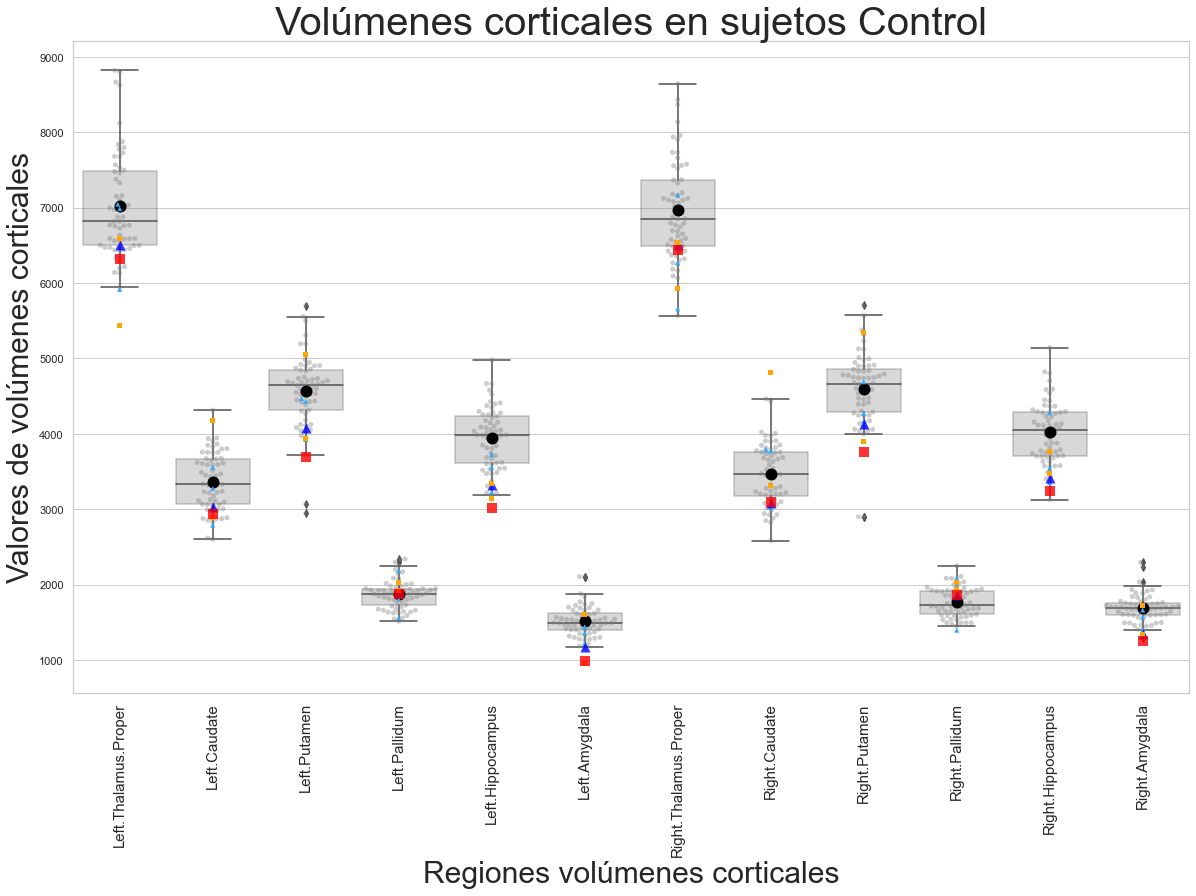

In [162]:
sns.set(color_codes=True)
sns.set_style("whitegrid")
fig = matplotlib.figure(2, figsize=(20, 12))
                        
#sujetos CONTROL bien clasificados
df_CTR_OK_volumes_values = df_CTR_OK_volumes.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_CTR_OK_volumes_values, color="grey", alpha=0.4, marker='o')
#sujeto promedio alzhéimer
sns.swarmplot(data=df_CTR_mean_volumes, color='black', s=12, marker='o')

# CONTROLES CLASIFICADOS COMO ALZHÉIMERS 
df_CTR_NOTOK_volumes_AD = df_CTR_NOTOK_volumes[df_CTR_NOTOK_volumes['Predict_Class']=='AD']
df_CTR_NOTOK_volumes_AD = df_CTR_NOTOK_volumes_AD.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_CTR_NOTOK_volumes_AD, color='#33A8FF', alpha=1, marker='^', s=5)
# control promedio
sns.swarmplot(data=df_AD_mean_volumes, color='blue', alpha=0.8, marker='^', s=10)

# CONTROLES CLASIFICADOS COMO DEMENCIA FRONTOTEMPORAL 
df_CTR_NOTOK_volumes_DFT = df_CTR_NOTOK_volumes[df_CTR_NOTOK_volumes['Predict_Class']=='DFT']
df_CTR_NOTOK_volumes_DFT = df_CTR_NOTOK_volumes_DFT.drop(columns=['ID', 'Group', 'Predict_Class', 'Sex', 'Age_at_MRI'])
sns.swarmplot(data=df_CTR_NOTOK_volumes_DFT, color='orange', alpha=1, marker='s', s=5)
# control promedio
sns.swarmplot(data=df_DFT_mean_volumes, color='red', alpha=0.8, marker='s', s=10)

# bloxplot de los valores de alzhéimers bien clasificados
ax = sns.boxplot(data=df_CTR_OK_volumes_values, boxprops=dict(alpha=.3), color='grey')

ax.set_title('Volúmenes corticales en sujetos Control', fontsize=40)
ax.set_xlabel(xlabel='Regiones volúmenes corticales', fontsize=30)
ax.set_ylabel(ylabel='Valores de volúmenes corticales', fontsize=30)
ax.set_xticklabels(df_AD_mean_volumes.columns, rotation=90, fontsize=15)

fig.savefig("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/CTR/CTRvsMalClass-Volumes_2.jpg", dpi=400, bbox_inches='tight')
fig.show()

# Desviación estándar

La desviación estándar es una medida que nos da información sobre los valores que se alejan del valor medio. Esto lo vamos a aplicar en todas las columnas por tipo de sujeto (AD / DFT / CTR) bien clasificado, por lo tanto, en teoría nos tendría que dar un resultado por columna, donde la desviación esté repsentada por un *boxplot* donde todos los puntos bien clasificados estén dentro de este boxplot o muy cerca.

## Buscamos el Error Cuadrático Medio por cada paciente:

En el siguiente chunk aparece error debido a que el dataframe que se está intentando cargar no ya tiene ECM calculado para cada uno de los sujetos y el número de columnas por lo tanto, cuando se hace el cálculo no es el mismo. **Saltarse este chunck si se a calculado previamente el ECM de cada sujeto respecto a cada sujeto promedio** 

In [8]:
df_all = pd.read_csv('/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/all_Classification_date.csv')
df_all.drop(columns='Unnamed: 0', inplace=True, axis=1)
df_all_values = df_all.drop(columns=['ID', 'Group', 'Predict_Class', 'AD_prob', 'CTR_prob', 'DFT_prob', 'Sex', 'Age_at_MRI'])

#sujetos promedio por clase
df_AD_OK_mean_values = df_AD_OK_mean.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob'])
df_DFT_OK_mean_values = df_DFT_OK_mean.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob'])
df_CTR_OK_mean_values = df_CTR_OK_mean.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob'])

MSE_AD = []
MSE_DFT = []
MSE_CTR = []

for i in df_all_values.index:
    actual = df_all_values.loc[i].values
    MSE_AD.append(mean_squared_error(df_AD_OK_mean_values.loc[0].values, actual))
    MSE_CTR.append(mean_squared_error(df_CTR_OK_mean_values.loc[0].values, actual))
    MSE_DFT.append(mean_squared_error(df_DFT_OK_mean_values.loc[0].values, actual))
    
#Guardamos los resultados
df_all['MSE_AD']=MSE_AD
df_all['MSE_DFT']=MSE_DFT
df_all['MSE_CTR']=MSE_CTR
df_all.to_csv('/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/all_Classification_date.csv')

ValueError: Found input variables with inconsistent numbers of samples: [84, 93]

## Error Cuadrático Medio ~ Valores Normalizados

## Normalización de valores
Normalización de los valores de todas las columnas que entran en juego a la hora de calcular error cuadrático medio (Espesores y volúmenes).
1. Normalización de los datos de las regiones de **todos los pacientes**.
2. Normalización de los datos de las regiones de los **sujetos promedio**.

## Normalización estándar

In [15]:
from sklearn.preprocessing import StandardScaler


columnas_regiones = ['rh_middletemporal_thickness',
                            'rh_supramarginal_thickness',
                            'rh_superiortemporal_thickness',
                            'rh_insula_thickness',
                            'rh_inferiortemporal_thickness',
                            'rh_inferiorparietal_thickness',
                            'rh_fusiform_thickness',
                            'rh_bankssts_thickness',
                            'rh_precuneus_thickness',
                            'rh_lateralorbitofrontal_thickness',
                            'rh_medialorbitofrontal_thickness',
                            'rh_superiorfrontal_thickness',
                            'rh_temporalpole_thickness',
                            'rh_precentral_thickness',
                            'rh_entorhinal_thickness',
                            'rh_posteriorcingulate_thickness',
                            'rh_parahippocampal_thickness',
                            'rh_parsopercularis_thickness',
                            'rh_isthmuscingulate_thickness',
                            'rh_caudalmiddlefrontal_thickness',
                            'rh_postcentral_thickness',
                            'rh_superiorparietal_thickness',
                            'rh_rostralmiddlefrontal_thickness',
                            'rh_parsorbitalis_thickness',
                            'rh_parstriangularis_thickness',
                            'rh_lateraloccipital_thickness',
                            'rh_paracentral_thickness',
                            'rh_rostralanteriorcingulate_thickness',
                            'rh_transversetemporal_thickness',
                            'rh_lingual_thickness',
                            'rh_cuneus_thickness',
                            'rh_frontalpole_thickness',
                            'rh_pericalcarine_thickness',
                            'rh_caudalanteriorcingulate_thickness',
                            'lh_middletemporal_thickness',
                            'lh_supramarginal_thickness',
                            'lh_superiortemporal_thickness',
                            'lh_insula_thickness',
                            'lh_inferiortemporal_thickness',
                            'lh_inferiorparietal_thickness',
                            'lh_fusiform_thickness',
                            'lh_bankssts_thickness',
                            'lh_precuneus_thickness',
                            'lh_lateralorbitofrontal_thickness',
                            'lh_medialorbitofrontal_thickness',
                            'lh_superiorfrontal_thickness',
                            'lh_temporalpole_thickness',
                            'lh_precentral_thickness',
                            'lh_entorhinal_thickness',
                            'lh_posteriorcingulate_thickness',
                            'lh_parahippocampal_thickness',
                            'lh_parsopercularis_thickness',
                            'lh_isthmuscingulate_thickness',
                            'lh_caudalmiddlefrontal_thickness',
                            'lh_postcentral_thickness',
                            'lh_superiorparietal_thickness',
                            'lh_rostralmiddlefrontal_thickness',
                            'lh_parsorbitalis_thickness',
                            'lh_parstriangularis_thickness',
                            'lh_lateraloccipital_thickness',
                            'lh_paracentral_thickness',
                            'lh_rostralanteriorcingulate_thickness',
                            'lh_transversetemporal_thickness',
                            'lh_lingual_thickness',
                            'lh_cuneus_thickness',
                            'lh_frontalpole_thickness',
                            'lh_pericalcarine_thickness',
                            'lh_caudalanteriorcingulate_thickness',
                            'Left.Lateral.Ventricle',
                            'Left.Cerebellum.Cortex',
                            'Left.Thalamus.Proper',
                            'Left.Caudate',
                            'Left.Putamen',
                            'Left.Pallidum',
                            'Left.Hippocampus',
                            'Left.Amygdala',
                            'Right.Lateral.Ventricle',
                            'Right.Cerebellum.Cortex',
                            'Right.Thalamus.Proper',
                            'Right.Caudate',
                            'Right.Putamen',
                            'Right.Pallidum',
                            'Right.Hippocampus',
                            'Right.Amygdala']
df_all_normalized = df_all.copy()
df_AD_OK_mean_normalized= df_AD_OK_mean.copy()
df_DFT_OK_mean_normalized = df_DFT_OK_mean.copy()
df_CTR_OK_mean_normalized = df_CTR_OK_mean.copy()
for i in columnas_regiones:
    scaler = StandardScaler()
    scaler.fit(df_all_normalized[i].values.reshape(-1,1))
    print(scaler.mean_)
  
    df_all_normalized[i] = scaler.transform(df_all_normalized[i].values.reshape(-1,1))
    df_AD_OK_mean_normalized[i] = scaler.transform(df_AD_OK_mean_normalized[i].values.reshape(-1,1))
    df_DFT_OK_mean_normalized[i] = scaler.transform(df_DFT_OK_mean_normalized[i].values.reshape(-1,1))
    df_CTR_OK_mean_normalized[i] = scaler.transform(df_CTR_OK_mean_normalized[i].values.reshape(-1,1))
    
df_all_normalized = df_all_normalized.drop(columns=['MSE_AD', 'MSE_DFT', 'MSE_CTR', 'MSE_DFT_grosor_cortical',
                                                'MSE_CTR_grosor_cortical', 'MSE_AD_volumen_subcortical', 'MSE_DFT_volumen_subcortical',
                                                'MSE_CTR_volumen_subcortical', 'MSE_AD_grosor_cortical'])
df_all_normalized.to_csv('/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/all_Classification_date_normalizados_Z.csv')
df_all_normalized


[2.74942857]
[2.46265517]
[2.68474384]
[2.87305419]
[2.72672414]
[2.38579803]
[2.66593103]
[2.47657635]
[2.32253202]
[2.62078818]
[2.39141872]
[2.61977833]
[3.52892118]
[2.51312315]
[3.30852217]
[2.40419704]
[2.67751232]
[2.50753202]
[2.30733498]
[2.45766502]
[2.08995567]
[2.1574335]
[2.31752709]
[2.66459113]
[2.40177833]
[2.29237931]
[2.45619212]
[2.83587192]
[2.4070936]
[2.03492118]
[1.93705419]
[2.74681281]
[1.68629064]
[2.49728079]
[2.69508867]
[2.46384236]
[2.62968473]
[2.87723645]
[2.68916749]
[2.3435468]
[2.64839409]
[2.3883399]
[2.28333498]
[2.59855665]
[2.38142857]
[2.62316256]
[3.43803941]
[2.55226108]
[3.17697537]
[2.39950246]
[2.697867]
[2.49892611]
[2.26847783]
[2.47587685]
[2.11461576]
[2.17790148]
[2.34462069]
[2.67021182]
[2.40295567]
[2.22675862]
[2.40355172]
[2.73457143]
[2.34194089]
[1.98959606]
[1.85426601]
[2.73672414]
[1.66028571]
[2.66623153]
[14705.35073892]
[50649.98817734]
[6641.44137931]
[3119.54827586]
[4175.06305419]
[1883.19950739]
[3540.92118227]
[1290.39

ID Group Predict_Class   AD_prob  CTR_prob  DFT_prob  Sex  \
0    sub-0001_01    AD           CTR  0.171298  0.668187  0.160514    1   
1    sub-0002_01    AD           CTR  0.331023  0.500238  0.168739    0   
2    sub-0003_01    AD            AD  0.737131  0.092139  0.170730    1   
3    sub-0004_01    AD            AD  0.736925  0.091891  0.171184    0   
4    sub-0005_01    AD            AD  0.675071  0.095837  0.229092    1   
..           ...   ...           ...       ...       ...       ...  ...   
198  sub-0355_01   CTR           CTR  0.177566  0.662179  0.160255    1   
199  sub-0368_01    AD           DFT  0.245520  0.099077  0.655403    1   
200  sub-0369_01   CTR           CTR  0.170675  0.669349  0.159975    0   
201  sub-0370_01   CTR           CTR  0.175420  0.664537  0.160043    1   
202  sub-0371_01   CTR           CTR  0.179149  0.660404  0.160447    1   

     Age_at_MRI  rh_middletemporal_thickness  rh_supramarginal_thickness  ...  \
0         50.40                    -0.165872                    0.120227  ...   
1         54.50                     0.542801                    0.491485  ...   
2         55.60                    -0.810484                   -0.751421  ...   
3         56.00                    -0.594279                   -1.004306  ...   
4         56.20                    -1.475115                   -1.138820  ...   
..          ...                          ...                         ...  ...   
198       64.66                     1.856048                    1.659062  ...   
199       61.68                    -0.057769                    0.034139  ...   
200       32.77                     0.971208                    0.625998  ...   
201       60.58                    -0.069781                    0.147130  ...   
202       56.31                     0.851094                    0.518387  ...   

     Left.Hippocampus  Left.Amygdala  Right.Lateral.Ventricle  \
0            0.050250       0.775558                -0.653280   
1            0.407875      -0.199224                 0.328659   
2           -0.613627      -1.168115                -0.813097   
3            0.589853       0.433188                -0.012508   
4           -1.995286      -1.826171                -0.155532   
..                ...            ...                      ...   
198         -0.301044      -0.352389                -0.980826   
199         -0.856928      -0.451496                -0.386241   
200          2.601201       1.421485                -0.835559   
201          1.094544       1.139411                -1.138773   
202         -0.491524      -0.004129                -0.436979   

     Right.Cerebellum.Cortex  Right.Thalamus.Proper  Right.Caudate  \
0                  -0.343621              -1.112088      -0.288602   
1                   2.164004               1.105651       0.146159   
2                  -0.738820              -1.358042      -1.842964   
3                   0.311676              -0.561866      -0.783180   
4                  -2.132300              -1.576580      -1.765534   
..                       ...                    ...            ...   
198                 0.025035              -0.533914       0.080936   
199                -1.213907              -1.652680      -1.525918   
200                 2.568480               1.169179       1.298721   
201                -0.826726               0.014035      -0.363940   
202                -1.334361              -1.435881      -0.500140   

     Right.Putamen  Right.Pallidum  Right.Hippocampus  Right.Amygdala  
0        -0.480362       -0.896441           0.085620        0.172314  
1         0.896417        0.848184           0.680068       -0.601326  
2        -0.978362       -1.909042          -0.615189       -1.141461  
3         0.172137        0.490716           0.639188        0.324421  
4        -1.260557       -0.811008          -2.130954       -2.078245  
..             ...             ...                ...             ...  
198       0.67

In [16]:
df_all_values = df_all_normalized.drop(columns=['ID', 'Group', 'Predict_Class', 'AD_prob', 'CTR_prob', 'DFT_prob', 'Sex', 
                                                'Age_at_MRI'])

#sujetos promedio por clase
df_AD_OK_mean_values = df_AD_OK_mean_normalized.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob'])
df_DFT_OK_mean_values = df_DFT_OK_mean_normalized.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob'])
df_CTR_OK_mean_values = df_CTR_OK_mean_normalized.drop(columns=['AD_prob', 'CTR_prob', 'DFT_prob'])

MSE_AD = []
MSE_DFT = []
MSE_CTR = []

for i in df_all_values.index:
    actual = df_all_values.loc[i].values
    MSE_AD.append(mean_squared_error(df_AD_OK_mean_values.loc[0].values, actual))
    MSE_CTR.append(mean_squared_error(df_CTR_OK_mean_values.loc[0].values, actual))
    MSE_DFT.append(mean_squared_error(df_DFT_OK_mean_values.loc[0].values, actual))
    
#Guardamos los resultados
df_all_normalized['MSE_AD']=MSE_AD
df_all_normalized['MSE_DFT']=MSE_DFT
df_all_normalized['MSE_CTR']=MSE_CTR
df_all_normalized.to_csv('/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/all_Classification_date_normalizados_Z.csv')
df_all_normalized

ID Group Predict_Class   AD_prob  CTR_prob  DFT_prob  Sex  \
0    sub-0001_01    AD           CTR  0.171298  0.668187  0.160514    1   
1    sub-0002_01    AD           CTR  0.331023  0.500238  0.168739    0   
2    sub-0003_01    AD            AD  0.737131  0.092139  0.170730    1   
3    sub-0004_01    AD            AD  0.736925  0.091891  0.171184    0   
4    sub-0005_01    AD            AD  0.675071  0.095837  0.229092    1   
..           ...   ...           ...       ...       ...       ...  ...   
198  sub-0355_01   CTR           CTR  0.177566  0.662179  0.160255    1   
199  sub-0368_01    AD           DFT  0.245520  0.099077  0.655403    1   
200  sub-0369_01   CTR           CTR  0.170675  0.669349  0.159975    0   
201  sub-0370_01   CTR           CTR  0.175420  0.664537  0.160043    1   
202  sub-0371_01   CTR           CTR  0.179149  0.660404  0.160447    1   

     Age_at_MRI  rh_middletemporal_thickness  rh_supramarginal_thickness  ...  \
0         50.40                    -0.165872                    0.120227  ...   
1         54.50                     0.542801                    0.491485  ...   
2         55.60                    -0.810484                   -0.751421  ...   
3         56.00                    -0.594279                   -1.004306  ...   
4         56.20                    -1.475115                   -1.138820  ...   
..          ...                          ...                         ...  ...   
198       64.66                     1.856048                    1.659062  ...   
199       61.68                    -0.057769                    0.034139  ...   
200       32.77                     0.971208                    0.625998  ...   
201       60.58                    -0.069781                    0.147130  ...   
202       56.31                     0.851094                    0.518387  ...   

     Right.Cerebellum.Cortex  Right.Thalamus.Proper  Right.Caudate  \
0                  -0.343621              -1.112088      -0.288602   
1                   2.164004               1.105651       0.146159   
2                  -0.738820              -1.358042      -1.842964   
3                   0.311676              -0.561866      -0.783180   
4                  -2.132300              -1.576580      -1.765534   
..                       ...                    ...            ...   
198                 0.025035              -0.533914       0.080936   
199                -1.213907              -1.652680      -1.525918   
200                 2.568480               1.169179       1.298721   
201                -0.826726               0.014035      -0.363940   
202                -1.334361              -1.435881      -0.500140   

     Right.Putamen  Right.Pallidum  Right.Hippocampus  Right.Amygdala  \
0        -0.480362       -0.896441           0.085620        0.172314   
1         0.896417        0.848184           0.680068       -0.601326   
2        -0.978362       -1.909042          -0.615189       -1.141461   
3         0.172137        0.490716           0.639188        0.324421   
4        -1.260557       -0.811008          -2.130954       -2.078245   
..             ...             ...                ...             ...   
198       0.676299       -0.415769          -0.161787       -0.033944   
199      -2.389030       -1.659939          -0.314337       -0.322637   
200       0.846817        0.638200           1.632531        0.928364   
201       0.065852        0.418773           0.989592       -0.245721   
202      -0.215573       -1.485027          -0.949666        0.318212   

       MSE_AD   MSE_DFT   MSE_CTR  
0    0.762305  1.183971  0.443083  
1    0.870838  0.976741  0.734084  
2    0.839841  1.276485  1.392341  
3    0.646591  1.597134  1.266275  
4    1.056717  1.550507  2.916102  
..        ...       ...       ...  
198  2.412887  2.599211  0.847049  
199  1.276119  1.346509  1.316576  
200  1.998824  2.437978  0.772531  
201  0.699223  0.939951  0.324257  
202  1.140523  1.111424  0

In [17]:
import plotly.graph_objects as go

df_all_normalized = pd.read_csv('/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/all_Classification_date_normalizados_Z.csv')
df_all_CTR = df_all_normalized[df_all_normalized['Group']=='CTR']
df_all_CTR['Predict_Class'] = df_all_CTR['Predict_Class'].replace('AD', 'EA')

df_all_AD = df_all_normalized[df_all_normalized['Group']=='AD']
df_all_AD['Group'] = df_all_AD['Group'].replace('AD', 'EA')
df_all_AD['Predict_Class'] = df_all_AD['Predict_Class'].replace('AD', 'EA')


df_all_DFT = df_all_normalized[df_all_normalized['Group']=='DFT']
df_all_DFT['Predict_Class'] = df_all_DFT['Predict_Class'].replace('AD', 'EA')

df_all_CTR.rename(columns={'MSE_AD':'ECM_EA',
                            'MSE_CTR':'ECM_CTR',
                            'MSE_DFT':'ECM_DFT'}, inplace=True)
df_all_AD.rename(columns={'MSE_AD':'ECM_EA',
                            'MSE_CTR':'ECM_CTR',
                            'MSE_DFT':'ECM_DFT'}, inplace=True)
df_all_DFT.rename(columns={'MSE_AD':'ECM_EA',
                            'MSE_CTR':'ECM_CTR',
                            'MSE_DFT':'ECM_DFT'}, inplace=True)
df_all_CTR.sort_values(by="ECM_CTR", ascending=False, inplace=True)
df_all_AD.sort_values(by="ECM_EA", ascending=False, inplace=True)
df_all_DFT.sort_values(by="ECM_DFT", ascending=False, inplace=True)

df_MSE_CTR = df_all_CTR[['ID', 'Predict_Class', 'ECM_EA', 'ECM_CTR', 'ECM_DFT']]
df_MSE_AD = df_all_AD[['ID', 'Predict_Class', 'ECM_EA', 'ECM_CTR', 'ECM_DFT']]
df_MSE_DFT = df_all_DFT[['ID', 'Predict_Class', 'ECM_EA', 'ECM_CTR', 'ECM_DFT']]

# ALZHÉIMER
fig_AD = go.Figure()


fig_AD.add_trace(go.Bar(
  x = df_MSE_AD.ECM_EA.values,
  y = [df_MSE_AD.Predict_Class.values,
       df_MSE_AD.ID.values],
  name = "ECM_EA", orientation='h', marker={'color':'blue'}
))



fig_AD.add_trace(go.Bar(
  x = df_MSE_AD.ECM_DFT.values,
  y = [df_MSE_AD.Predict_Class.values,
       df_MSE_AD.ID.values],
  name = "ECM_DFT",orientation='h', marker={'color':'red'}
))


fig_AD.add_trace(go.Bar(
  x = df_MSE_AD.ECM_CTR.values,
  y = [df_MSE_AD.Predict_Class.values,
       df_MSE_AD.ID.values],
  name = "ECM_CTR",orientation='h', marker={'color':'grey'}
))

fig_AD.update_layout(barmode='stack', 
                     height=1500, 
                     title='Error cuadrático medio (ECM) en la clasificación del grupo EA<br>DATOS NORMALIZADOS - Z score',
                     xaxis_title='Unidades de Desviación estándar',
                     yaxis_title='ID de sujeto')

fig_AD.update_xaxes(range=(0,11))

fig_AD.show()  

fig_AD.write_image("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/AD/MSE_AD_normalizado_Z.jpg")



# DEMENCIA FRONTOTEMPORAL
fig_DFT = go.Figure()


fig_DFT.add_trace(go.Bar(
  x = df_MSE_DFT.ECM_DFT.values,
  y = [df_MSE_DFT.Predict_Class.values,
       df_MSE_DFT.ID.values],
  name = "ECM_DFT", orientation='h', marker={'color':'red'}
))


fig_DFT.add_trace(go.Bar(
  x = df_MSE_DFT.ECM_EA.values,
  y = [df_MSE_DFT.Predict_Class.values,
       df_MSE_DFT.ID.values],
  name = "ECM_EA",orientation='h', marker={'color':'blue'}
))

fig_DFT.add_trace(go.Bar(
  x = df_MSE_DFT.ECM_CTR.values,
  y = [df_MSE_DFT.Predict_Class.values,
       df_MSE_DFT.ID.values],
  name = "ECM_CTR",orientation='h', marker={'color':'grey'}
))

fig_DFT.update_layout(barmode='stack', 
                      height=1500, 
                      title='Error cuadrático medio (ECM) en la clasificación del grupo DFT<br>DATOS NORMALIZADOS - Z score',
                      xaxis_title='Unidades de Desviación estándar',
                      yaxis_title='ID de sujeto')

fig_DFT.update_xaxes(range=(0,11))

fig_DFT.show()

fig_DFT.write_image("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/DFT/MSE_DFT_normalizado_Z.jpg")



# CONTROL
fig_CTR = go.Figure()

fig_CTR.add_trace(go.Bar(
  x = df_MSE_CTR.ECM_CTR.values,
  y = [df_MSE_CTR.Predict_Class.values,
       df_MSE_CTR.ID.values],
  name = "ECM_CTR", orientation='h', marker={'color':'grey'}
))

fig_CTR.add_trace(go.Bar(
  x = df_MSE_CTR.ECM_EA.values,
  y = [df_MSE_CTR.Predict_Class.values,
       df_MSE_CTR.ID.values],
  name = "ECM_EA",orientation='h', marker={'color':'blue'}
))


fig_CTR.add_trace(go.Bar(
  x = df_MSE_CTR.ECM_DFT.values,
  y = [df_MSE_CTR.Predict_Class.values,
       df_MSE_CTR.ID.values],
  name = "ECM_DFT",orientation='h', marker={'color':'red'}
))



fig_CTR.update_layout(barmode='stack', 
                      height=1500, 
                      title='Error cuadrático medio (ECM) en la clasificación del grupo CTR<br>DATOS NORMALIZADOS - Z score',
                      xaxis_title='Unidades de Desviación estándar',
                      yaxis_title='ID de sujeto')

fig_CTR.update_xaxes(range=(0,11))


fig_CTR.write_image("/Users/eguzkinehm/TFM/TFM_code/Calibrator_Classifier/RESULTADOS/CTR/MSE_CTR_normalizado_Z.jpg")

fig_CTR.show()

In [102]:
sujeto = df_MSE_CTR[df_MSE_CTR.ID=='sub-0191_01']
sujeto

ID Predict_Class    ECM_EA   ECM_CTR   ECM_DFT
142  sub-0191_01           CTR  0.551026  0.904516  1.022721

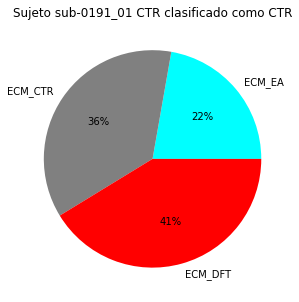

In [106]:
y = [sujeto['ECM_EA'].iloc[0], sujeto['ECM_CTR'].iloc[0], sujeto['ECM_DFT'].iloc[0]]
mylabels = ["ECM_EA", "ECM_CTR", "ECM_DFT"]
colors = ['cyan', 'grey', 'red']
plt.rcParams['figure.figsize'] = [5, 5]
plt.title("Sujeto " + sujeto.iloc[0].ID + " CTR" + " " + "clasificado como " + sujeto.iloc[0].Predict_Class)
plt.pie(y, labels=mylabels, colors=colors, autopct='%.0f%%')
plt.show()

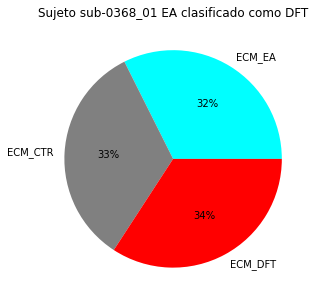

In [114]:
sujeto = df_MSE_AD[df_MSE_AD.ID=='sub-0368_01']
y = [sujeto['ECM_EA'].iloc[0], sujeto['ECM_CTR'].iloc[0], sujeto['ECM_DFT'].iloc[0]]
mylabels = ["ECM_EA", "ECM_CTR", "ECM_DFT"]
colors = ['cyan', 'grey', 'red']
plt.rcParams['figure.figsize'] = [5, 5]
plt.title("Sujeto " + sujeto.iloc[0].ID + " EA" + " " + "clasificado como " + sujeto.iloc[0].Predict_Class)
plt.pie(y, labels=mylabels, colors=colors, autopct='%.0f%%')
plt.show()

In [110]:
sujeto = df_MSE_DFT[df_MSE_DFT.ID=='sub-0209_01']